In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerias a Utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import matplotlib.dates as mdates
from scipy import stats
import re
import networkx as nx
import random

pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)

from scipy.stats import f_oneway, chi2_contingency

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error, r2_score, calinski_harabasz_score, davies_bouldin_score

#Librerías de  NN
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


#Métodos desarrollados
import sys
# Agregar la carpeta que contiene 'funciones.py' al sys.path
sys.path.append('/content/drive/MyDrive/HackathonAlstom')
from funciones_alstom import *


In [ ]:
df = pd.read_feather('/content/drive/MyDrive/HackathonAlstom/Cuaderno/data/DF_competencia_datos_UTP.feather')
df = df.sort_values(by='timestamp')
df.head()

variable,timestamp,ACE1_EC,ACE2_EC,ATC_CS,ATC_DS,PCE1_EC,PCE1_ER,PCE2_EC,PCE2_ER,PCE3_EC,PCE3_ER,PCE4_EC,PCE4_ER,UMC_LBA,UMC_ODO,asset
0,2024-02-15 03:38:33.507000-05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALS_T11
1,2024-02-15 03:38:49.004000-05:00,1049710,1046682,0,0,11700411,-5937053,16333473,-7839368,16384520,-7997521,13010133,-8093560,0,0,ALS_T11
2,2024-02-15 03:38:55.007000-05:00,1049710,1046682,0,0,11700411,-5937053,16333473,-7839368,16384520,-7997521,13010133,-8093560,0,0,ALS_T11
3,2024-02-15 03:39:04.507000-05:00,1049710,1046683,0,0,11700411,-5937053,16333473,-7839368,16384520,-7997521,13010133,-8093560,0,0,ALS_T11
4,2024-02-15 03:39:14.009000-05:00,1049710,1046683,0,0,11700411,-5937053,16333473,-7839368,16384520,-7997521,13010133,-8093560,0,0,ALS_T11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152878 entries, 0 to 2152877
Data columns (total 16 columns):
 #   Column     Dtype                                    
---  ------     -----                                    
 0   timestamp  timestamp[ns, tz=America/Panama][pyarrow]
 1   ACE1_EC    int32[pyarrow]                           
 2   ACE2_EC    int32[pyarrow]                           
 3   ATC_CS     int32[pyarrow]                           
 4   ATC_DS     int32[pyarrow]                           
 5   PCE1_EC    int32[pyarrow]                           
 6   PCE1_ER    int32[pyarrow]                           
 7   PCE2_EC    int32[pyarrow]                           
 8   PCE2_ER    int32[pyarrow]                           
 9   PCE3_EC    int32[pyarrow]                           
 10  PCE3_ER    int32[pyarrow]                           
 11  PCE4_EC    int32[pyarrow]                           
 12  PCE4_ER    int32[pyarrow]                           
 13  UMC_LBA    i

In [ ]:
df.nunique()

,0
variable,
timestamp,2151757
ACE1_EC,68589
ACE2_EC,63091
ATC_CS,35
ATC_DS,27
PCE1_EC,1279801
PCE1_ER,1217115
PCE2_EC,1257454
PCE2_ER,1206309


Con los valores únicos podemos identificar que variables son numéricas y cuales son categóricas.


In [ ]:
minimo = 36
variables_categoricas = list(df.loc[:, df.nunique() < minimo])
print(f'Las variables categóricas son: {variables_categoricas}')

variables_categoricas.append('timestamp') #Con el fin de no ser identificada como numerica y no arruinar la funcion de visualizaciones
variables_numericas = list(set(df.columns) - set(variables_categoricas))
variables_categoricas.remove('timestamp')
print(f'Las variables numéricas son: {variables_numericas}')

Las variables categóricas son: ['ATC_CS', 'ATC_DS', 'UMC_LBA', 'asset']
Las variables numéricas son: ['UMC_ODO', 'PCE3_ER', 'PCE4_ER', 'ACE2_EC', 'ACE1_EC', 'PCE1_ER', 'PCE1_EC', 'PCE2_EC', 'PCE4_EC', 'PCE3_EC', 'PCE2_ER']


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
variable,,,,,,,,
timestamp,2152878,2024-03-01 08:59:25.484565248-05:00,2024-02-15 03:38:33.507000-05:00,2024-02-22 20:10:29.307749888-05:00,2024-03-01 12:58:33.416000-05:00,2024-03-08 10:38:19.797999872-05:00,2024-03-15 23:41:32.866000-05:00,NaN
ACE1_EC,2152878.0,308798.706437,0.0,404.0,1316.0,1032349.0,1065535.0,471296.700379
ACE2_EC,2152878.0,435330.202006,0.0,424.0,1410.0,1039574.0,1065535.0,512584.166926
ATC_CS,2152878.0,104.035461,0.0,0.0,0.0,210.0,439.0,158.436826
ATC_DS,2152878.0,242.423626,0.0,201.0,216.0,411.0,501.0,157.199969
PCE1_EC,2152878.0,9894606.278196,0.0,4924187.25,10150155.5,14662966.25,19999989.0,5816361.349193
PCE1_ER,2152878.0,-5829087.584073,-13545047.0,-8605944.0,-5848160.0,-2863547.75,0.0,3526209.112818
PCE2_EC,2152878.0,9872342.093853,0.0,4364481.5,9960929.0,15368151.0,19999997.0,6134579.017659
PCE2_ER,2152878.0,-5766599.548205,-13422056.0,-8799131.0,-5743508.0,-2528685.0,0.0,3645065.367382


<h3> Interpretando los estadísticos </h3>



1.   La data que tenemos disponible viene a partir del 15 de febrero de este año.
2.   Tenemos valores muy negativos en las variables de Regeneración de Energía.

3. Existen bastantes variables con valores mínimos de cero, esto puede significar que se toma en consideración registros cuando el tren esta en reposo o iniciando.

4. Parece que los registros manejan las variables numéricas como la frecuencia acumulada





<h3> ¿Existe algún tipo de valor faltante en nuestra data? </h3>

In [ ]:
df.isnull().sum().sum()

0

#<h3> Creando características que nos pueden ayudar a cuantificar el consumo de energía </h3>

La idea aquí es sumar las caracteristicas que tienen un consumo de energia con las variables que generan energía. Debido a que las variables generadoras son negativas, podemos representar dicha operacion como una suma. Luego de esto, utilizar visualizaciones con la data agrupada por tren en cada característica y revisar los valores que salen fuera de lo común.

In [ ]:
df['EnergiaRegenerada'] = abs(df['PCE1_ER'] + df['PCE2_ER'] + df['PCE3_ER'] + df['PCE4_ER'])
df['EnergiaConsumidaTraccion'] =  (df['PCE1_EC'] + df['PCE2_EC'] + df['PCE3_EC'] + df['PCE4_EC']) - df['EnergiaRegenerada']
df['EnergiaConsumidaConvertidor'] = df['ACE1_EC'] + df['ACE2_EC']
df['EnergiaConsumidaTotal'] = df['EnergiaConsumidaTraccion'] + df['EnergiaConsumidaConvertidor']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152878 entries, 0 to 2152877
Data columns (total 20 columns):
 #   Column                       Dtype                                    
---  ------                       -----                                    
 0   timestamp                    timestamp[ns, tz=America/Panama][pyarrow]
 1   ACE1_EC                      int32[pyarrow]                           
 2   ACE2_EC                      int32[pyarrow]                           
 3   ATC_CS                       int32[pyarrow]                           
 4   ATC_DS                       int32[pyarrow]                           
 5   PCE1_EC                      int32[pyarrow]                           
 6   PCE1_ER                      int32[pyarrow]                           
 7   PCE2_EC                      int32[pyarrow]                           
 8   PCE2_ER                      int32[pyarrow]                           
 9   PCE3_EC                      int32[pyarrow]   

<h3> Desglose de la variable de tiempo</h3>

La idea de desglozar esta característica es realizar visualizaciones con sus atributos para poder responder las siguientes preguntas:

1. ¿Cuáles son las horas de mayor consumo energético?
2. ¿Qué día de la semana es cuando más energía se consume?
3. ¿Qué día del mes fue en el que más se consumió energía?

In [ ]:
df['Month'] = df['timestamp'].dt.month
df['Dayweek'] = df['timestamp'].dt.dayofweek
df['Day'] = df['timestamp'].dt.day
df['Hour'] = df['timestamp'].dt.hour
df['Minute'] = df['timestamp'].dt.minute
dias_semana = ['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom']
df['Dayweek'] = df['Dayweek'].apply(lambda x: dias_semana[x])
df['Second'] = df['timestamp'].dt.second

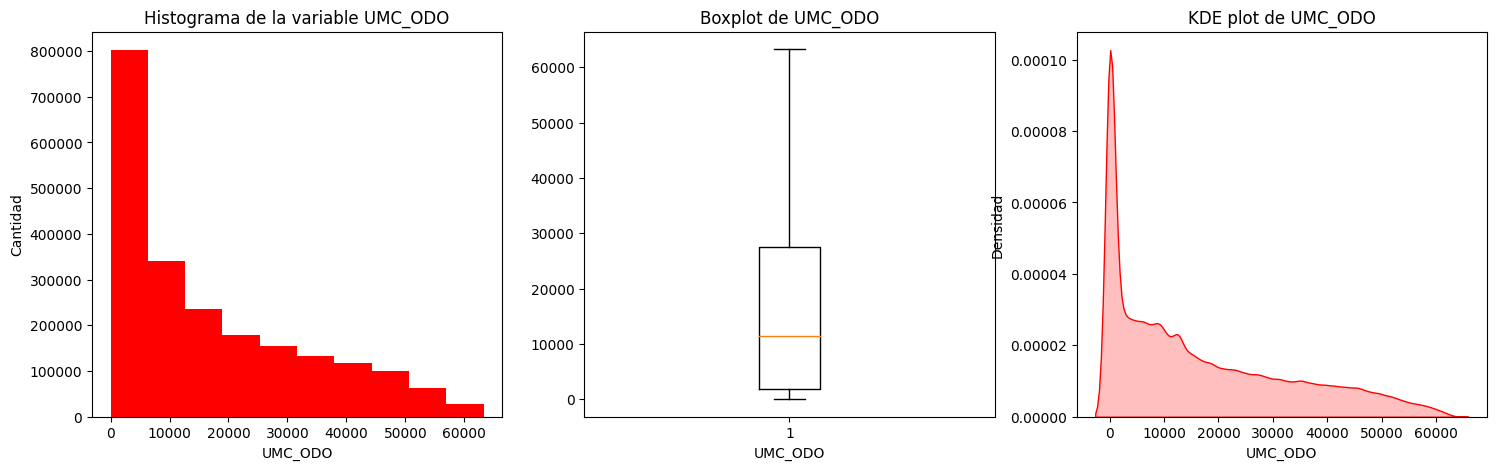

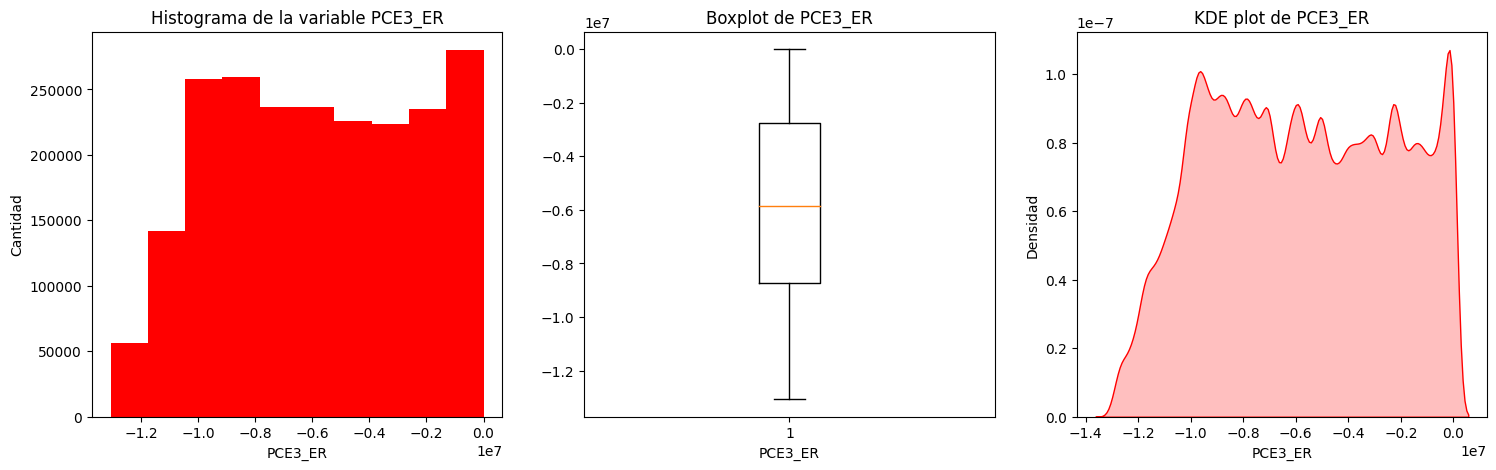

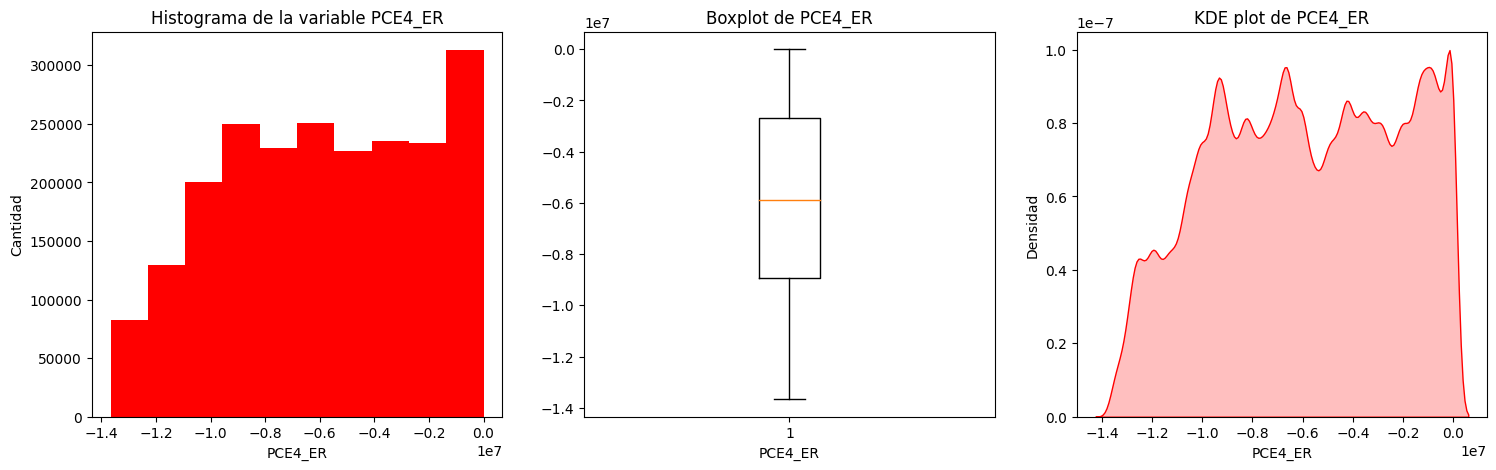

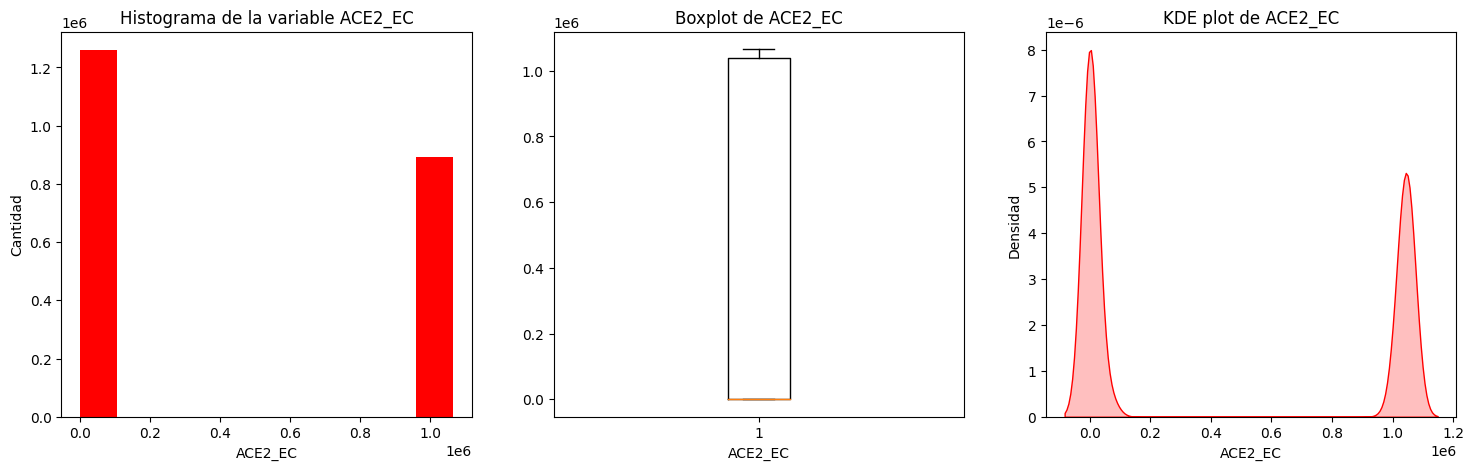

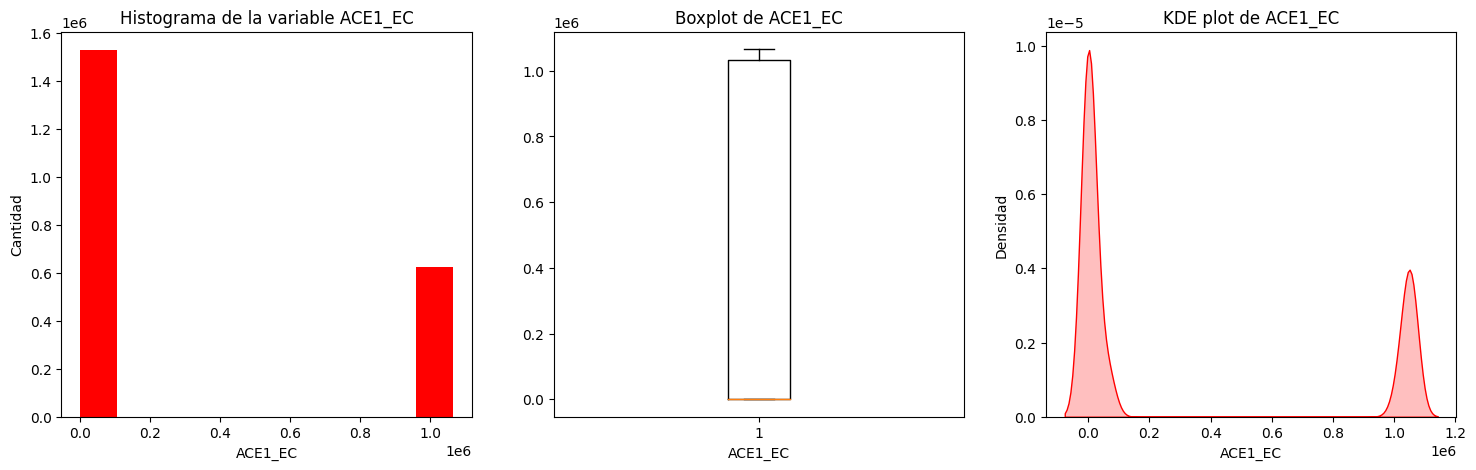

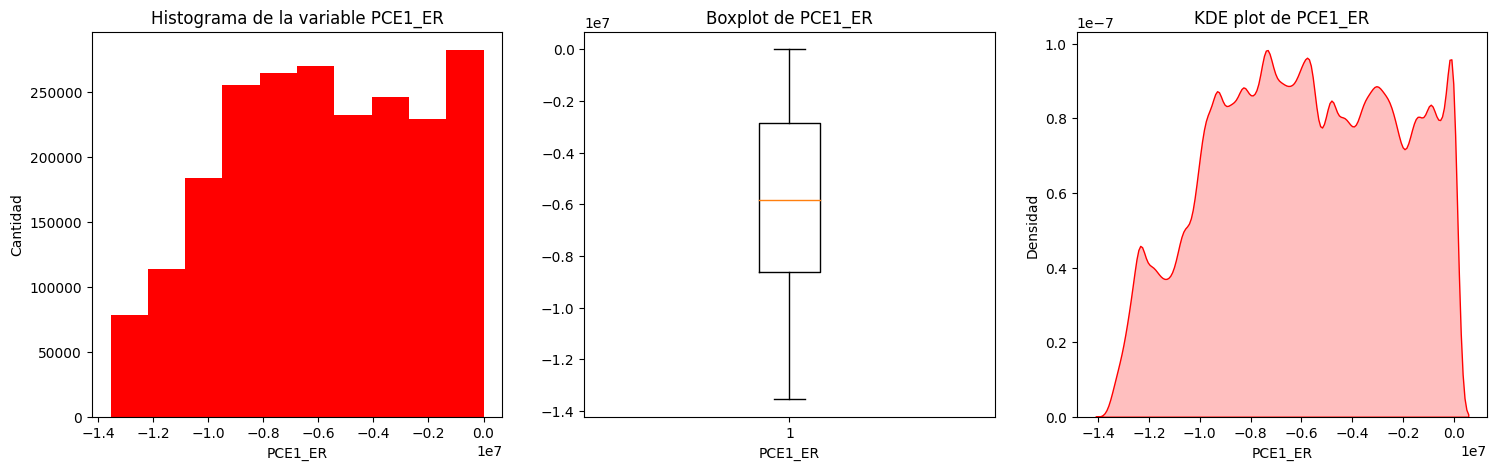

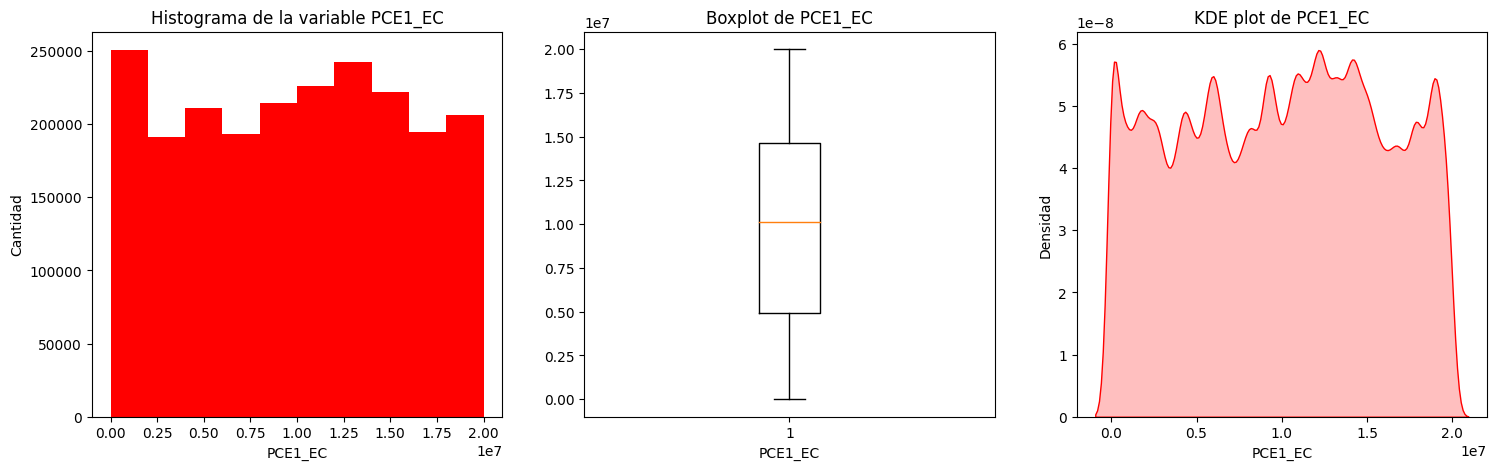

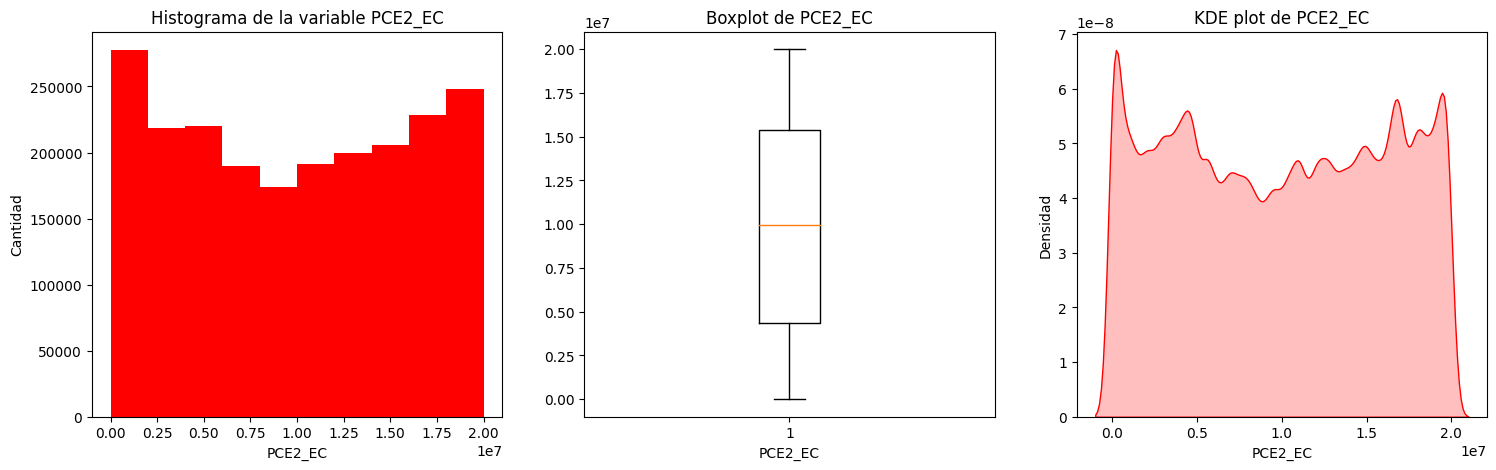

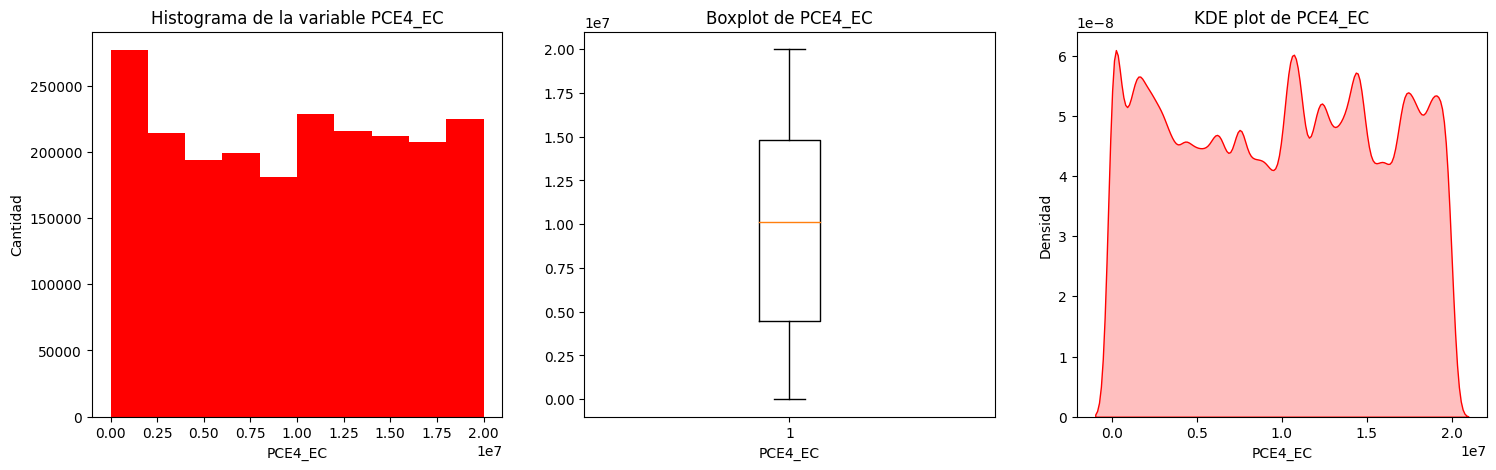

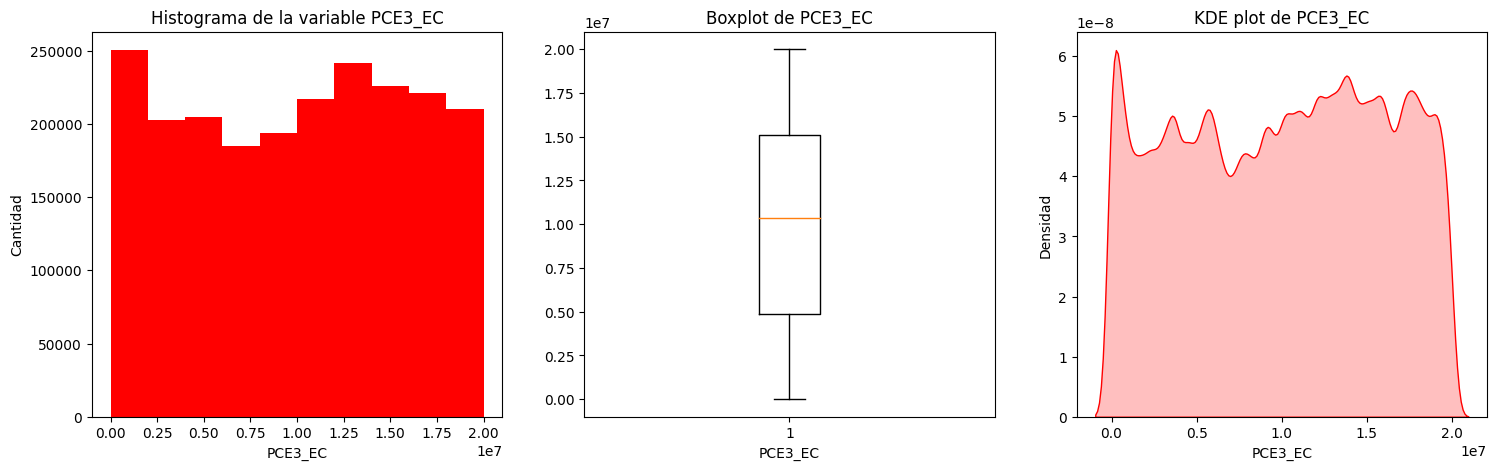

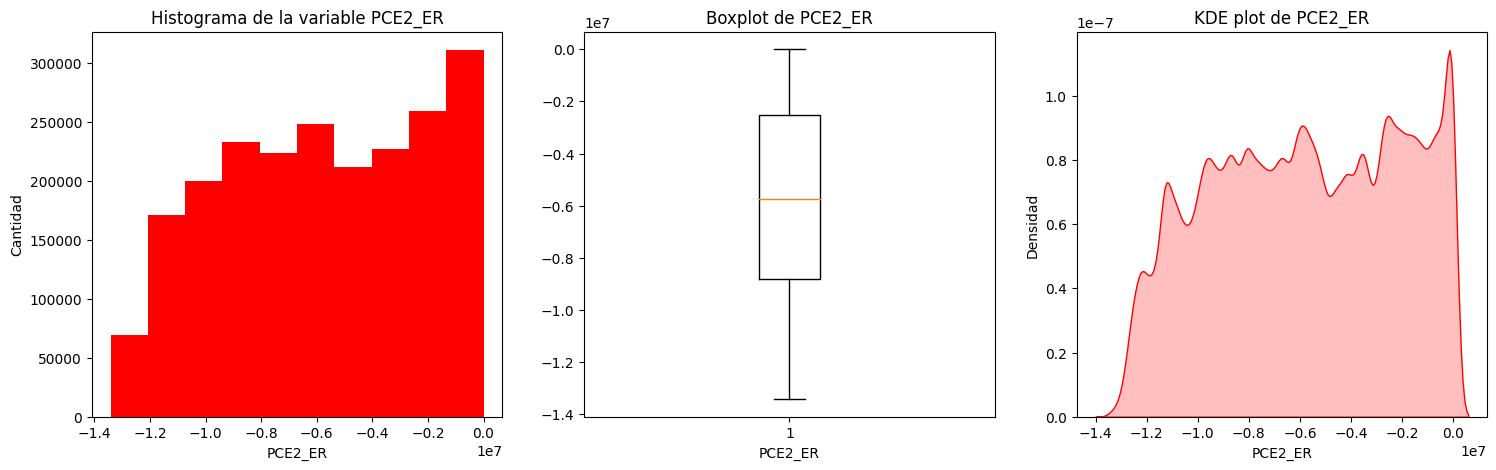

In [ ]:
for col in variables_numericas:
    estudio_univariante(df, col)

No se encontro ningun valor atípico según el criterio RIC, pero si podemos ver una gran densidad en los ceros en muchas de las variables.

# Limpieza de la Data

La idea es la siguiente:

Si un registro tiene una energía consumida de 0, ese registro no me da ningun tipo de información valiosa, ya que todos los sensores energéticos no están trabajando en dicho momento, por lo que no es valioso. Claro, esto es así, siempre y cuando estos registros esten distribuidos de manera uniforme en cada tren, por lo que antes de aplicar el tratamiento, veremos cuál es el comportamiento en todos los trenes para identificar un patron.

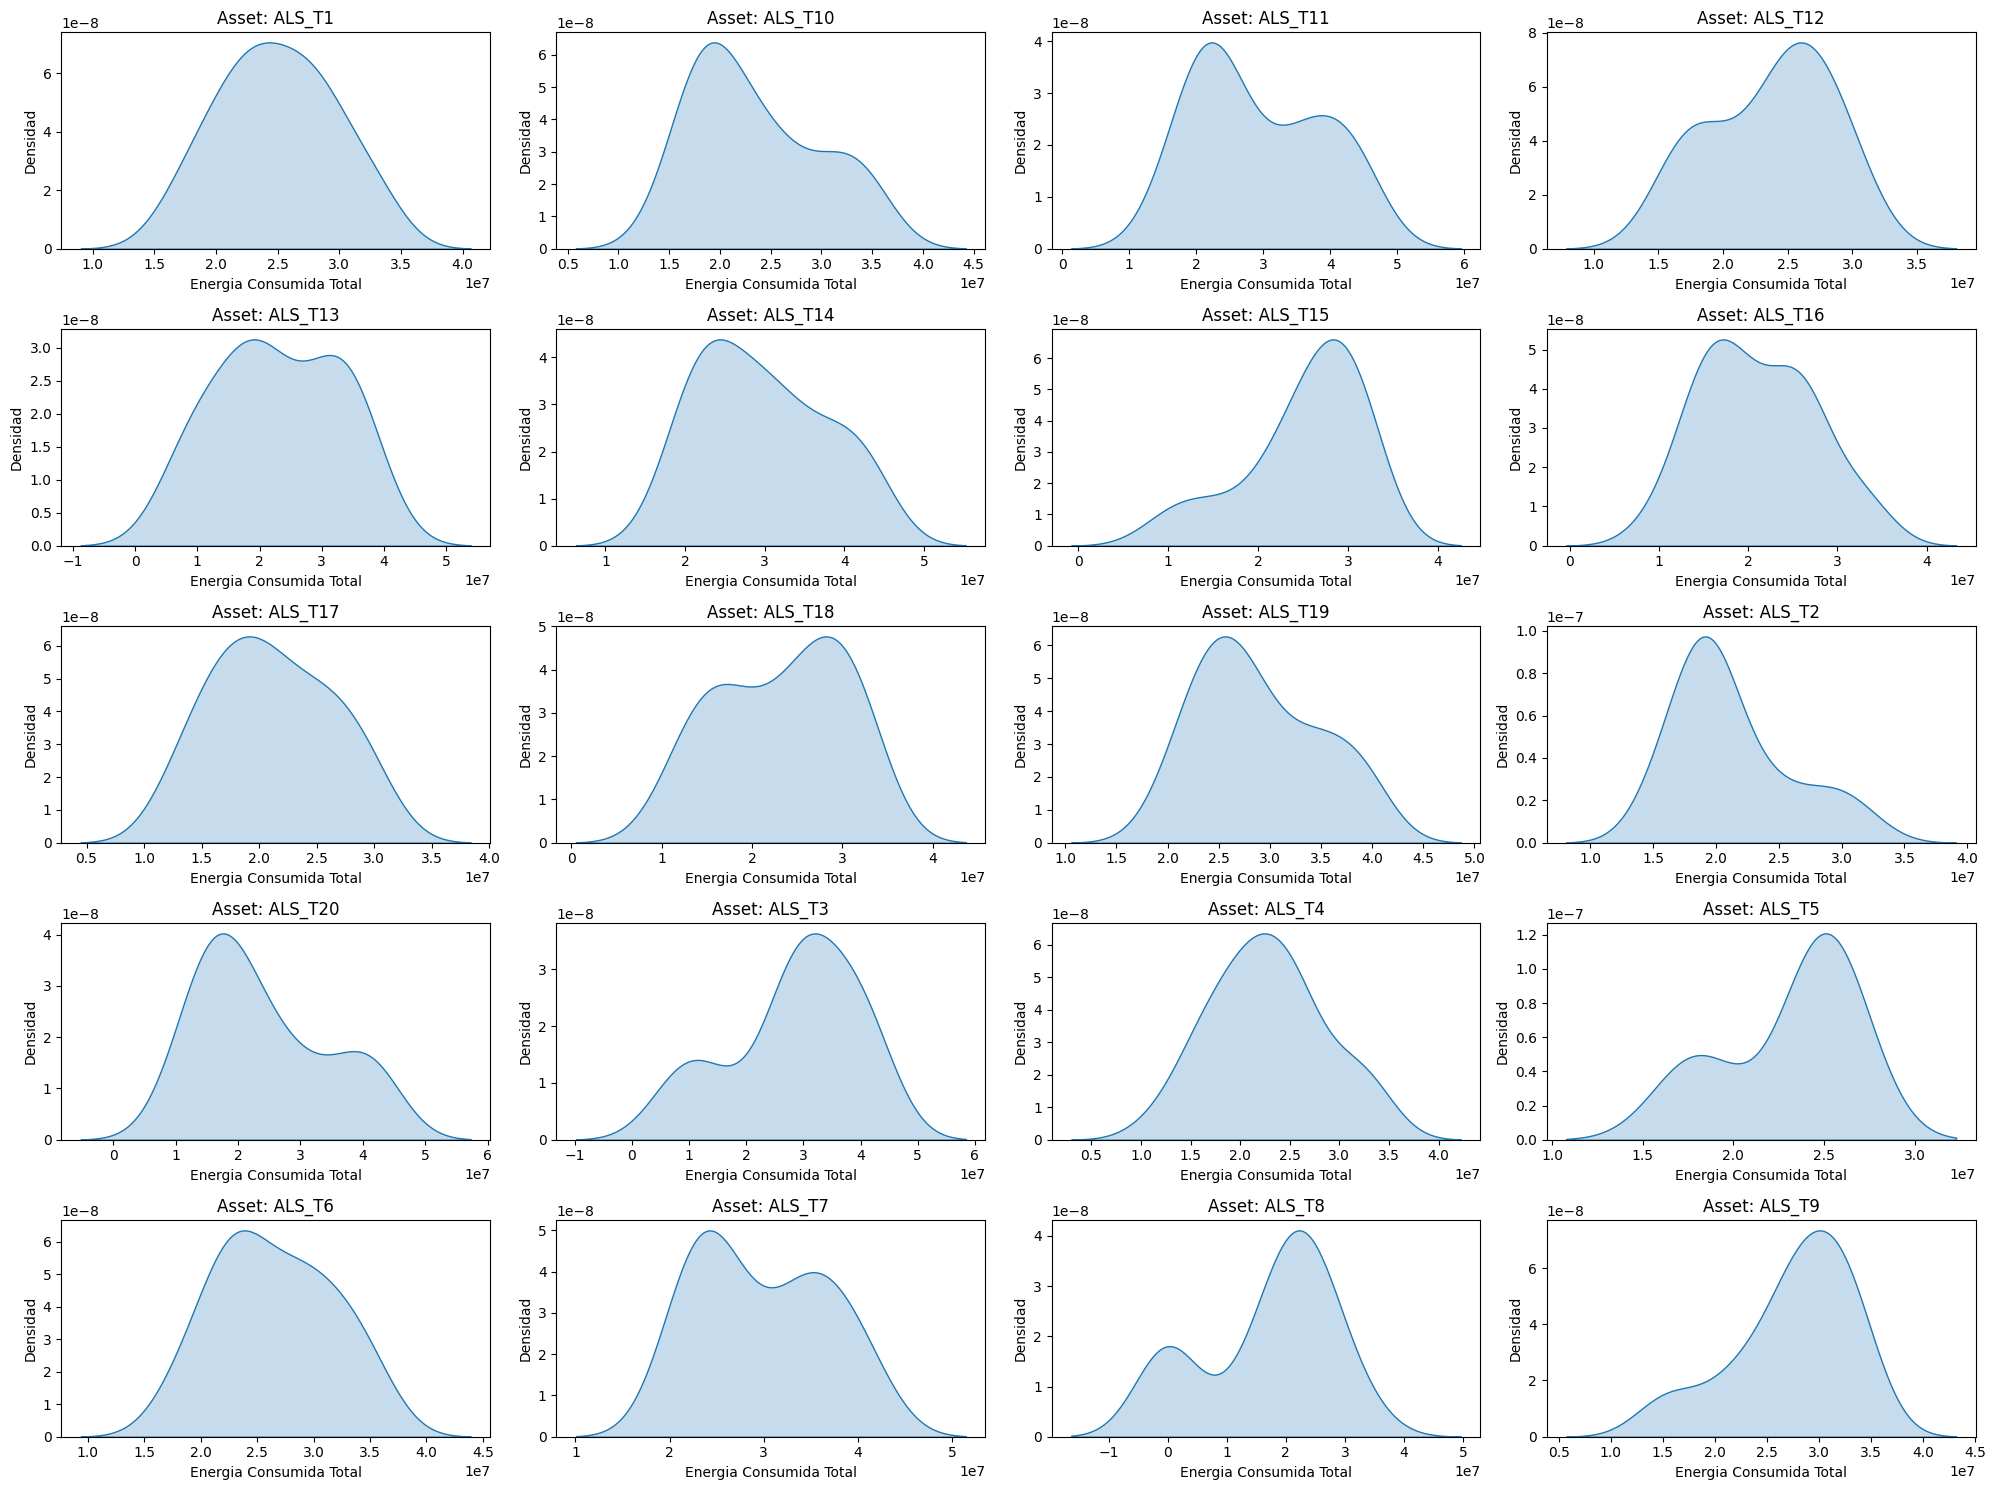

In [ ]:
df_max_trenes = df.groupby(['asset', 'Day'])['EnergiaConsumidaTotal'].max().reset_index()
fig, axes = plt.subplots(5, 4, figsize=(20, 15))
axes = axes.flatten()

for i, (asset, grupo) in enumerate(df_max_trenes.groupby('asset')):
    sns.kdeplot(grupo['EnergiaConsumidaTotal'], ax=axes[i], fill=True)
    axes[i].set_title(f'Asset: {asset}')
    axes[i].set_xlabel('Energia Consumida Total')
    axes[i].set_ylabel('Densidad')
plt.tight_layout()
plt.show()

Podemos ver que la mayor concentración de ceros en los trenes fue encontrada en el tren N°8. Para un análisis más robusto, comparemos las distribuciones con los demás trenes.

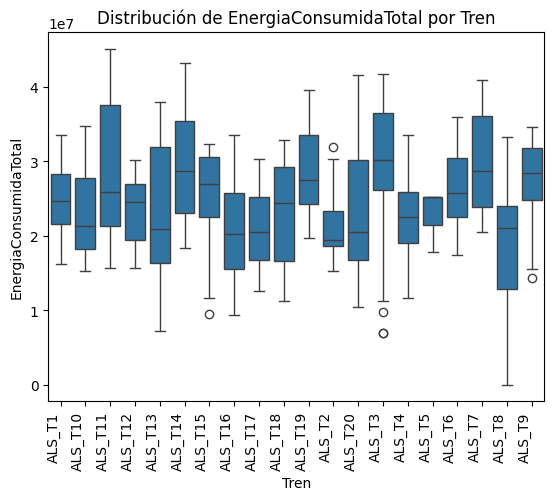

In [ ]:
sns.boxplot(x='asset', y='EnergiaConsumidaTotal', data=df_max_trenes)
plt.title('Distribución de EnergiaConsumidaTotal por Tren')
plt.xlabel('Tren')
plt.ylabel('EnergiaConsumidaTotal')
plt.xticks(rotation=90, ha='right')
plt.show()

Con esta visualización podemos ver que hay unas cosas peculiarles en los siguientes trenes:
1. Tren N°8: Tiene un rango muy extenso, donde el límite inferior esta tocando el 0, esto es un indicio de una gran cantidad de ceros en sus registros.
2. Tren N°5: No tiene limite superior definido, esto quiere decir que tiene una distribución uniforme a lo largo de la data entre los cuartiles 2-3.




In [ ]:
df_valores_nulos = df.loc[df['EnergiaConsumidaTotal'] == 0]
df_valores_nulos_t8 = df_valores_nulos.loc[df_valores_nulos['asset'] == 'ALS_T8']
print(f'Los valores nulos totales en el consumo energético son: {len(df_valores_nulos)}')
print(f'Los valores nulos totales en el tren N°8 son: {len(df_valores_nulos_t8)}')
print(f'Los valores nulos sin contar el tren N°8 son {len(df_valores_nulos) - len(df_valores_nulos_t8)}')

Los valores nulos totales en el consumo energético son: 39881
Los valores nulos totales en el tren N°8 son: 37105
Los valores nulos sin contar el tren N°8 son 2776


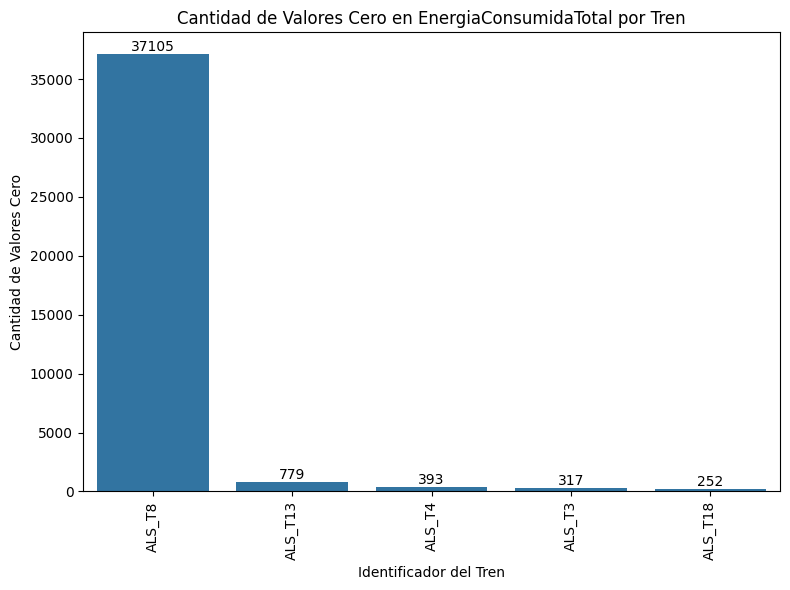

In [ ]:
df_nulos = df[df['EnergiaConsumidaTotal'] == 0].groupby('asset').size().reset_index(name='conteo_ceros')

df_nulos = df_nulos.sort_values('conteo_ceros', ascending=False)

df_nulos_top_5 = df_nulos.head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x='asset', y='conteo_ceros', data=df_nulos_top_5)
plt.title('Cantidad de Valores Cero en EnergiaConsumidaTotal por Tren')
plt.xlabel('Identificador del Tren')
plt.ylabel('Cantidad de Valores Cero')
plt.xticks(rotation=90)


for i, v in enumerate(df_nulos_top_5['conteo_ceros']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Con esto concluimos lo siguiente:
Los valores nulos no están distribuidos de manera aleatoria a lo largo de la flota de trenes. Igual antes de la imputación, veremos el comportamiento individual del tren.

In [ ]:
df['Fecha'] = pd.to_datetime('2024' + '-' +
                                    df['Month'].astype(str) + '-' +
                                    df['Day'].astype(str))
df['FechaHora'] = df['Fecha'] + pd.to_timedelta(df['Hour'], unit='h')

df.to_feather('/content/drive/MyDrive/HackathonAlstom/Cuaderno/data/alstomVariablesCreadas.feather')


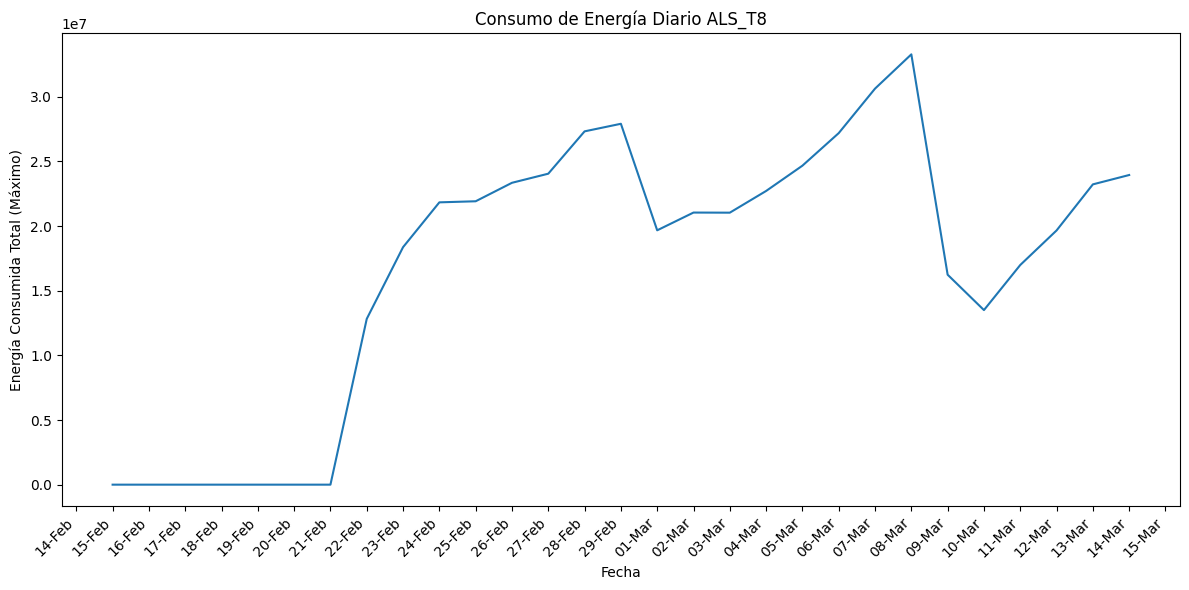

In [ ]:
timeline(df, 'ALS_T8')

In [ ]:
fecha = pd.to_datetime('2024-02-22')
df_t8 = df.loc[(df['asset'] == 'ALS_T8') & (df['Fecha'] < fecha)]
df_t8

variable,timestamp,ACE1_EC,ACE2_EC,ATC_CS,ATC_DS,PCE1_EC,PCE1_ER,PCE2_EC,PCE2_ER,PCE3_EC,PCE3_ER,PCE4_EC,PCE4_ER,UMC_LBA,UMC_ODO,asset,EnergiaRegenerada,EnergiaConsumidaTraccion,EnergiaConsumidaConvertidor,EnergiaConsumidaTotal,Month,Dayweek,Day,Hour,Minute,Second,Fecha,FechaHora
2828,2024-02-15 05:14:56.721000-05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALS_T8,0,0,0,0,2,Jue,15,5,14,56,2024-02-15,2024-02-15 05:00:00
2840,2024-02-15 05:15:06.724000-05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALS_T8,0,0,0,0,2,Jue,15,5,15,6,2024-02-15,2024-02-15 05:00:00
2848,2024-02-15 05:15:16.728000-05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALS_T8,0,0,0,0,2,Jue,15,5,15,16,2024-02-15,2024-02-15 05:00:00
2858,2024-02-15 05:15:26.731000-05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALS_T8,0,0,0,0,2,Jue,15,5,15,26,2024-02-15,2024-02-15 05:00:00
2869,2024-02-15 05:15:36.733000-05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALS_T8,0,0,0,0,2,Jue,15,5,15,36,2024-02-15,2024-02-15 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475326,2024-02-21 23:38:56.853000-05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALS_T8,0,0,0,0,2,Mie,21,23,38,56,2024-02-21,2024-02-21 23:00:00
475330,2024-02-21 23:39:06.855000-05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALS_T8,0,0,0,0,2,Mie,21,23,39,6,2024-02-21,2024-02-21 23:00:00
475334,2024-02-21 23:39:16.858000-05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALS_T8,0,0,0,0,2,Mie,21,23,39,16,2024-02-21,2024-02-21 23:00:00
475339,2024-02-21 23:39:26.864000-05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALS_T8,0,0,0,0,2,Mie,21,23,39,26,2024-02-21,2024-02-21 23:00:00


Antes pesaba que los registros en 0 en dichas fechas significaba simplemente que el tren no salio ese día, pero observando comportamientos de otros trenes, aquí nos damos cuenta que si el tren no estaba activo, simplemente no tiene registros ese día.

¿Qué concluimos con esto?
R) Los sensores por X o Y motivo no funcionarón de manera correcta, por lo que la data de estas fechas fue perdida. Con esto podemos eliminar la opción de eliminar estos registros y decantarnos más en una técnica de imputación.


# Imputaciones

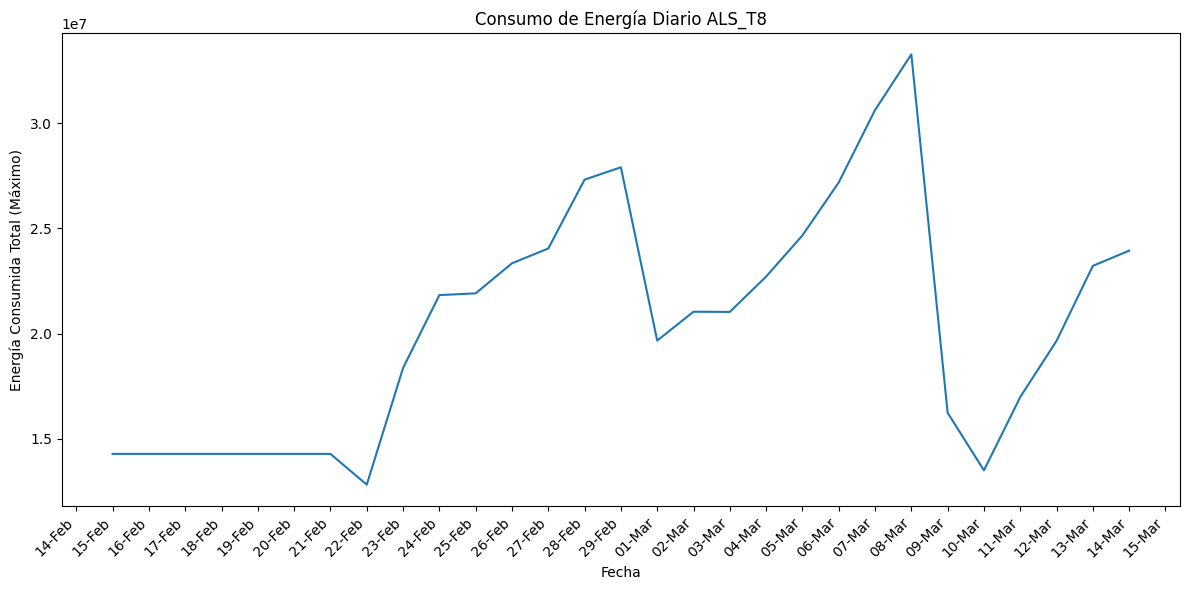

In [ ]:
df_imputed_median = df.copy()
inicio_fecha = pd.to_datetime('2024-02-22')




mask_filtro = (df_imputed_median['Fecha'] < inicio_fecha) & (df_imputed_median['asset'] == 'ALS_T8')


columnas_a_imputar = ['PCE1_EC', 'PCE2_EC', 'PCE3_EC', 'PCE4_EC', 'PCE1_ER', 'PCE2_ER', 'PCE3_ER', 'PCE4_ER', 'ACE1_EC', 'ACE2_EC']
mediana_energia_consumida = df_imputed_median.loc[(df_imputed_median['Fecha'] >= inicio_fecha) &
                                               (df_imputed_median['asset'] == 'ALS_T8'),
                                               columnas_a_imputar].median()

for columna in columnas_a_imputar:
    df_imputed_median.loc[mask_filtro, columna] = mediana_energia_consumida[columna]

df_imputed_median['EnergiaRegenerada'] = abs(df_imputed_median['PCE1_ER'] + df_imputed_median['PCE2_ER'] +
                                          df_imputed_median['PCE3_ER'] + df_imputed_median['PCE4_ER'])

df_imputed_median['EnergiaConsumidaTraccion'] = (df_imputed_median['PCE1_EC'] + df_imputed_median['PCE2_EC'] +
                                              df_imputed_median['PCE3_EC'] + df_imputed_median['PCE4_EC']) - df_imputed_median['EnergiaRegenerada']

df_imputed_median['EnergiaConsumidaConvertidor'] = df_imputed_median['ACE1_EC'] + df_imputed_median['ACE2_EC']

df_imputed_median['EnergiaConsumidaTotal'] = df_imputed_median['EnergiaConsumidaTraccion'] + df_imputed_median['EnergiaConsumidaConvertidor']

timeline(df_imputed_median, 'ALS_T8')

In [ ]:
df_imputed_median.head()

variable,timestamp,ACE1_EC,ACE2_EC,ATC_CS,ATC_DS,PCE1_EC,PCE1_ER,PCE2_EC,PCE2_ER,PCE3_EC,PCE3_ER,PCE4_EC,PCE4_ER,UMC_LBA,UMC_ODO,asset,EnergiaRegenerada,EnergiaConsumidaTraccion,EnergiaConsumidaConvertidor,EnergiaConsumidaTotal,Month,Dayweek,Day,Hour,Minute,Second,Fecha,FechaHora
0,2024-02-15 03:38:33.507000-05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALS_T11,0,0,0,0,2,Jue,15,3,38,33,2024-02-15,2024-02-15 03:00:00
1,2024-02-15 03:38:49.004000-05:00,1049710,1046682,0,0,11700411,-5937053,16333473,-7839368,16384520,-7997521,13010133,-8093560,0,0,ALS_T11,29867502,27561035,2096392,29657427,2,Jue,15,3,38,49,2024-02-15,2024-02-15 03:00:00
2,2024-02-15 03:38:55.007000-05:00,1049710,1046682,0,0,11700411,-5937053,16333473,-7839368,16384520,-7997521,13010133,-8093560,0,0,ALS_T11,29867502,27561035,2096392,29657427,2,Jue,15,3,38,55,2024-02-15,2024-02-15 03:00:00
3,2024-02-15 03:39:04.507000-05:00,1049710,1046683,0,0,11700411,-5937053,16333473,-7839368,16384520,-7997521,13010133,-8093560,0,0,ALS_T11,29867502,27561035,2096393,29657428,2,Jue,15,3,39,4,2024-02-15,2024-02-15 03:00:00
4,2024-02-15 03:39:14.009000-05:00,1049710,1046683,0,0,11700411,-5937053,16333473,-7839368,16384520,-7997521,13010133,-8093560,0,0,ALS_T11,29867502,27561035,2096393,29657428,2,Jue,15,3,39,14,2024-02-15,2024-02-15 03:00:00


El resultado de la imputación basada en mediana fue muy triste. Para mejorar este resultado tan mediocre, se aplicará una manera de imputar los datos más compleja.

<h3> Imputación Avanzada: Media Móvil </h3>

La idea es la siguiente:

Para la técnica de imputación propongo una media móvil que permita capturar la variabilidad de la data de manera más correcta. El propósito de utilizar esta técnica es intentar capturar la variabilidad que se genera por la tendencia generada entre los días de semana.



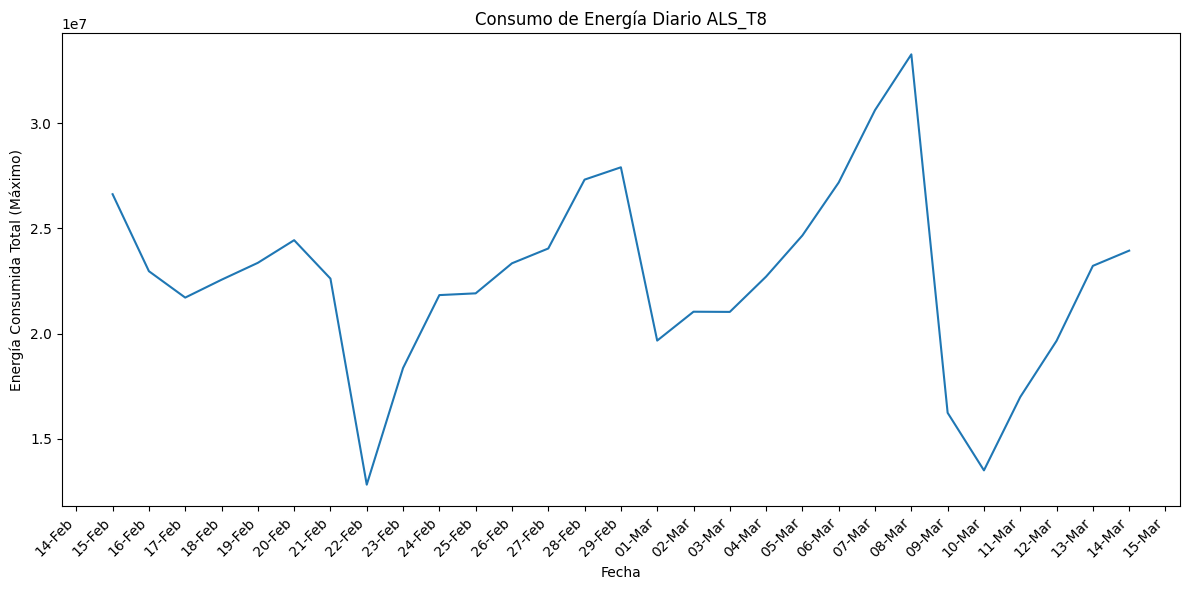

In [ ]:
df_imputed = df.copy()
fecha_corte = pd.to_datetime('2024-02-22')
mask_filtro = (df_imputed['Fecha'] < fecha_corte) & (df_imputed['asset'] == 'ALS_T8')
ventana_media_movil = 6
min_periods = 3
columnas_a_imputar = ['PCE1_EC', 'PCE2_EC', 'PCE3_EC', 'PCE4_EC',
                      'PCE1_ER', 'PCE2_ER', 'PCE3_ER', 'PCE4_ER',
                      'ACE1_EC', 'ACE2_EC']


def imputar_media_movil_futura(df, mask, columna, fecha_corte, ventana, min_periods):
    media_movil = round(df.loc[df['Fecha'] >= fecha_corte, columna].rolling(window=ventana, min_periods=min_periods).mean(),0)
    df.loc[mask, columna] = media_movil.iloc[:mask.sum()].values

    return df
for columna in columnas_a_imputar:
    df_imputed = imputar_media_movil_futura(df_imputed, mask_filtro, columna, fecha_corte, ventana_media_movil, min_periods)

df_imputed['EnergiaRegenerada'] = abs(df_imputed['PCE1_ER'] + df_imputed['PCE2_ER'] +
                                      df_imputed['PCE3_ER'] + df_imputed['PCE4_ER'])

df_imputed['EnergiaConsumidaTraccion'] = (df_imputed['PCE1_EC'] + df_imputed['PCE2_EC'] +
                                          df_imputed['PCE3_EC'] + df_imputed['PCE4_EC']) - df_imputed['EnergiaRegenerada']

df_imputed['EnergiaConsumidaConvertidor'] = df_imputed['ACE1_EC'] + df_imputed['ACE2_EC']

df_imputed['EnergiaConsumidaTotal'] = df_imputed['EnergiaConsumidaTraccion'] + df_imputed['EnergiaConsumidaConvertidor']

timeline(df_imputed, 'ALS_T8')

# Visualizando las Rutas

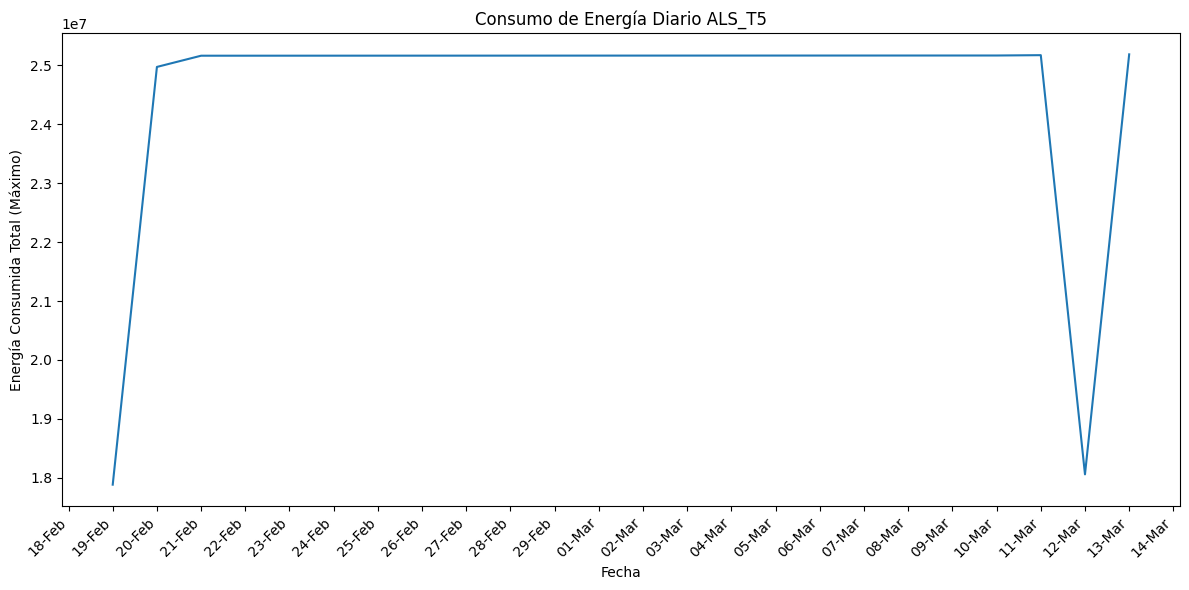

In [ ]:
timeline(df_imputed, 'ALS_T5')

Esto se ve muy raro, no tiene buena pinta. Sabemos que el consumo de energía es dependiente del peso que carga el tren, por lo que, el hecho de que el consumo se mantenga constante a lo largo del tiempo, es muy extraño. Debido a este comportamiento propongo estudiar las rutas para intentar exprimirle la información.



In [ ]:
df_tren_raro = df_imputed.loc[(df_imputed['asset'] == 'ALS_T5')]
ruta_frecuencias = df_tren_raro.groupby(['ATC_CS', 'ATC_DS']).size().reset_index(name='Frecuencia')
ruta_frecuencias.head(5)

,ATC_CS,ATC_DS,Frecuencia
0,0,0,8379
1,201,0,10
2,201,201,3
3,202,0,3
4,203,0,2


Según los expertos en el dominio del tema, el valor de 0, es que el destino o el origen es indefinido, por lo que la hipótesis planteada, es la siguiente:
1.  El tren hizo la mayoría de su recorrido en la misma ruta, entonces su consumo energético se mantiene en fluctuaciones bajas, y debido a la magnitud de los datos, como el cambio es muy pequeño parece que se mantiene constante.

Tristemente, no podemos saber si es cierto ya que las rutas 0 con 0 son indefinidas.

In [ ]:
df_rutas = df_imputed.copy()
df_rutas['ruta'] = df_rutas['ATC_CS'].astype(str) + '-' + df_rutas['ATC_DS'].astype(str)
trenes_por_ruta = df_rutas.groupby('ruta')['asset'].unique().reset_index()
print(trenes_por_ruta)

        ruta  \
0        0-0   
1      0-201   
2      0-204   
3      0-206   
4      0-209   
..       ...   
301  437-439   
302  437-501   
303    439-0   
304  439-411   
305  439-439   

                                                                                                                                                                           asset  
0    [ALS_T11, ALS_T19, ALS_T15, ALS_T17, ALS_T10, ALS_T7, ALS_T9, ALS_T14, ALS_T1, ALS_T2, ALS_T8, ALS_T18, ALS_T13, ALS_T6, ALS_T4, ALS_T20, ALS_T16, ALS_T3, ALS_T5, ALS_T12]  
1                                                                                         [ALS_T17, ALS_T10, ALS_T15, ALS_T2, ALS_T18, ALS_T16, ALS_T4, ALS_T13, ALS_T9, ALS_T8]  
2                                                                                                                                    [ALS_T2, ALS_T13, ALS_T15, ALS_T10, ALS_T8]  
3                                                                                          

<Figure size 600x400 with 0 Axes>

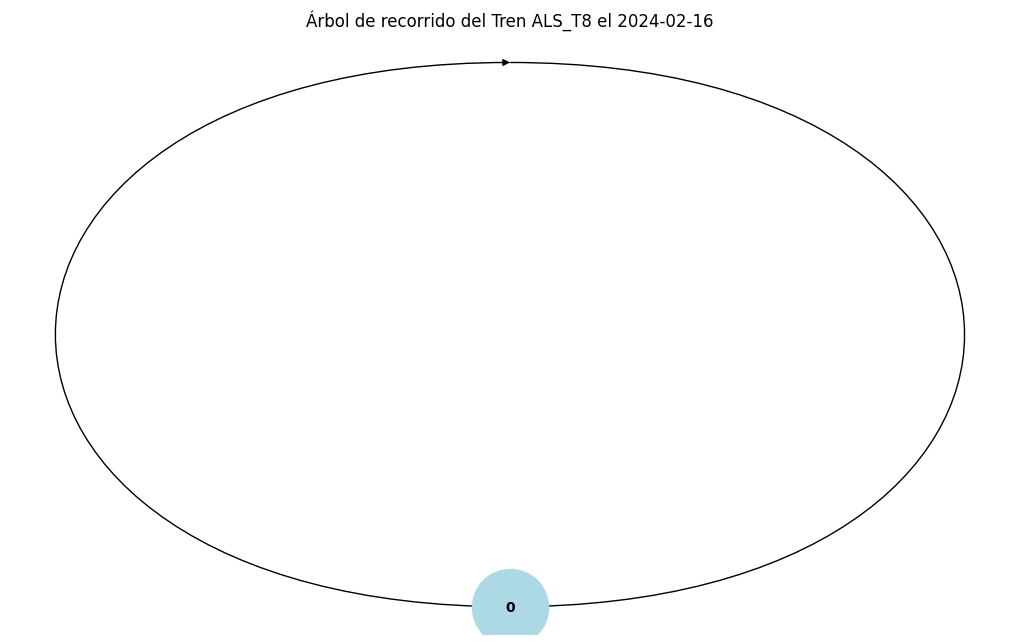

In [ ]:
df_trayecto_tren = df_imputed.groupby(['Fecha', 'asset'])['timestamp'].agg(['min', 'max']).reset_index()
def dibujar_arbol_recorrido(df, fecha, tren):
    plt.figure(figsize=(6, 4))
    df_tren_fecha = df[(df['Fecha'] == fecha) & (df['asset'] == tren)]

    if df_tren_fecha.empty:
        print(f"No hay registros disponibles para el Tren {tren} en la fecha {fecha}.")
        return


    df_tren_fecha = df_tren_fecha.sort_values(by='FechaHora')
    G = nx.DiGraph()


    for i, row in df_tren_fecha.iterrows():
        atc_cs = row['ATC_CS']
        atc_ds = row['ATC_DS']
        G.add_edge(atc_cs, atc_ds)


    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
    plt.title(f'Árbol de recorrido del Tren {tren} el {fecha}')
    plt.show()

dibujar_arbol_recorrido(df_imputed, '2024-02-16', 'ALS_T8')



<Figure size 600x400 with 0 Axes>

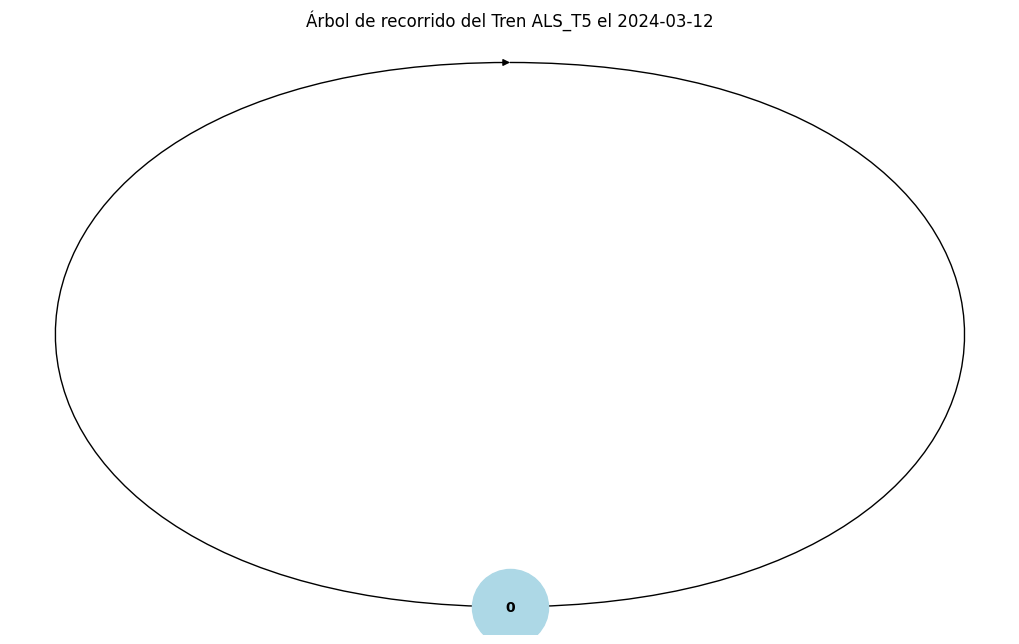

In [ ]:
dibujar_arbol_recorrido(df_imputed, '2024-03-12', 'ALS_T5')

En esta fecha el tren estuvó recorriendo la misma ruta, o simplemente fallo la computadora a la hora de enviar la información.

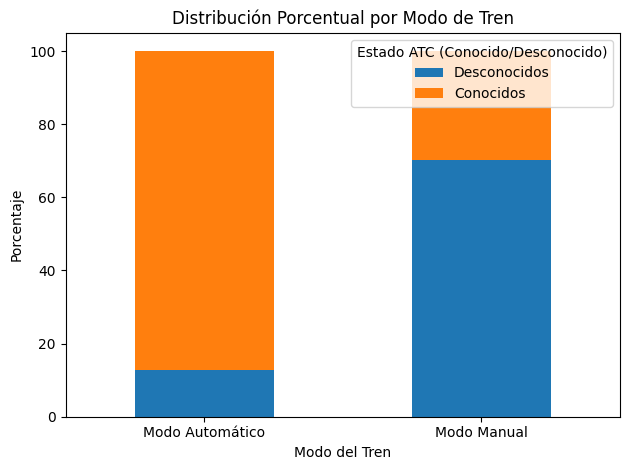

In [ ]:
df_modo_automatico = df_imputed.loc[(df_imputed['UMC_LBA'] == 1)]
df_modo_automatico_unk = df_modo_automatico.loc[(df_modo_automatico['ATC_DS'] == 0) & (df_modo_automatico['ATC_CS'] == 0)]
df_modo_automatico_known = df_modo_automatico.loc[(df_modo_automatico['ATC_DS'] != 0) & (df_modo_automatico['ATC_CS'] != 0)]


df_modo_manual = df_imputed.loc[(df_imputed['UMC_LBA'] == 0)]
df_modo_manual_unk = df_modo_manual.loc[(df_modo_manual['ATC_DS'] == 0) & (df_modo_manual['ATC_CS'] == 0)]
df_modo_manual_known = df_modo_manual.loc[~((df_modo_manual['ATC_DS'] == 0) & (df_modo_manual['ATC_CS'] == 0))]


registros_modo_automatico_unk = len(df_modo_automatico_unk)
registros_modo_automatico_known = len(df_modo_automatico_known)
registros_modo_manual_unk = len(df_modo_manual_unk)
registros_modo_manual_known = len(df_modo_manual_known)


data = {
    'Desconocidos': [registros_modo_automatico_unk, registros_modo_manual_unk],
    'Conocidos': [registros_modo_automatico_known, registros_modo_manual_known]
}

df_porcentajes = pd.DataFrame(data, index=['Modo Automático', 'Modo Manual'])
df_porcentajes_pct = df_porcentajes.div(df_porcentajes.sum(axis=1), axis=0) * 100
df_porcentajes_pct.plot(kind='bar', stacked=True)


plt.title('Distribución Porcentual por Modo de Tren')
plt.xlabel('Modo del Tren')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)
plt.legend(title='Estado ATC (Conocido/Desconocido)')
plt.tight_layout()
plt.show()


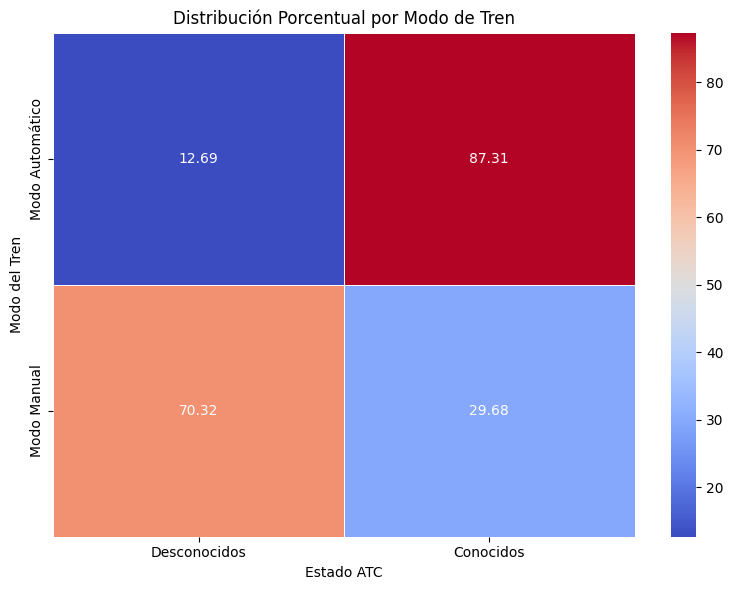

In [ ]:
df_porcentajes = pd.DataFrame(data, index=['Modo Automático', 'Modo Manual'])

df_porcentajes_pct = df_porcentajes.div(df_porcentajes.sum(axis=1), axis=0) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(df_porcentajes_pct, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Distribución Porcentual por Modo de Tren')
plt.xlabel('Estado ATC')
plt.ylabel('Modo del Tren')
plt.tight_layout()
plt.show()

Los valores de entrada y salida del tren son conocidos la mayor parte de las veces cuando el tren está en modo MANUAL. Mientras que si el tren se encuentra en modo automático, pasa el caso contrario.

¿Es esto una casualidad?
Para resolver esta duda aplicaremos un test de Chi-cuadrado con un nivel de significancia de 1%


In [ ]:

datos = {
    'Manual': [len(df_modo_manual_unk), len(df_modo_manual_known)],
    'Automático': [len(df_modo_automatico_unk), len(df_modo_automatico_known)]
}

tabla_contingencia = pd.DataFrame(
    datos,
    index=['Desconocido (Unknown)', 'Conocido (Known)']
)

chi2, p_valor, grados_libertad, valores_esperados = chi2_contingency(tabla_contingencia)

n = tabla_contingencia.values.sum()
min_dim = min(tabla_contingencia.shape) - 1
v_cramer = np.sqrt(chi2 / (n * min_dim))


alpha = 0.01
print("\nInterpretación:")
if p_valor < alpha:
    print(f"Con un nivel de significancia de {alpha}, rechazamos la hipótesis nula. El p-valor fue de: {p_valor}")
    print("Existe una relación estadísticamente significativa entre el modo del tren y el conocimiento de los valores ATC.")
else:
    print(f"Con un nivel de significancia de {alpha}, no podemos rechazar la hipótesis nula.")
    print("No hay evidencia suficiente para concluir que existe una relación entre el modo del tren y el conocimiento de los valores ATC.")

print("\nInterpretación del V de Cramer:")
if v_cramer < 0.1:
    print("La asociación es muy débil")
elif v_cramer < 0.3:
    print("La asociación es débil")
elif v_cramer < 0.5:
    print("La asociación es moderada")
else:
    print(f"La asociación es fuerte: {v_cramer:.2f}")




Interpretación:
Con un nivel de significancia de 0.01, rechazamos la hipótesis nula. El p-valor fue de: 0.0
Existe una relación estadísticamente significativa entre el modo del tren y el conocimiento de los valores ATC.

Interpretación del V de Cramer:
La asociación es fuerte: 0.59


 El p-valor obtenido fue menor al nivel de significancia de 0.01, lo que nos lleva a rechazar la hipótesis nula. Esto indica que existe una relación estadísticamente significativa entre el modo de operación del tren y el conocimiento de los valores ATC. Además, el valor de Crámer obtenido fue de 0.58, lo que sugiere una relación moderadamente fuerte entre estas variables. Esto respalda la idea de que el modo de conducción (manual o automático) influye en la precisión de los datos de origen y destino.

Se recomienda estudiar como influye el uso del tren de manera automática en el envió de señales de la computadora.

# Proporcion de destinos faltantes por tren

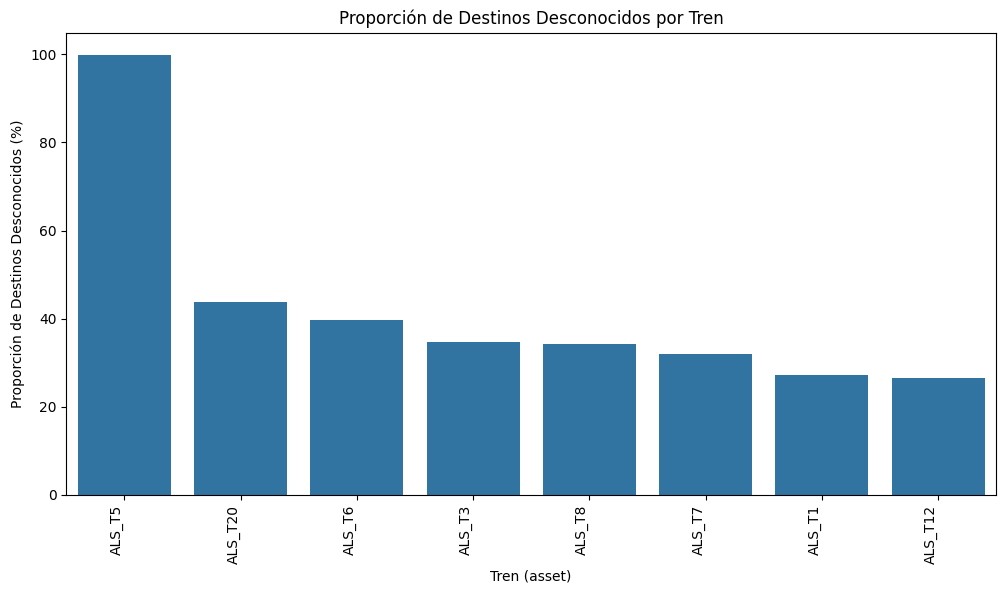

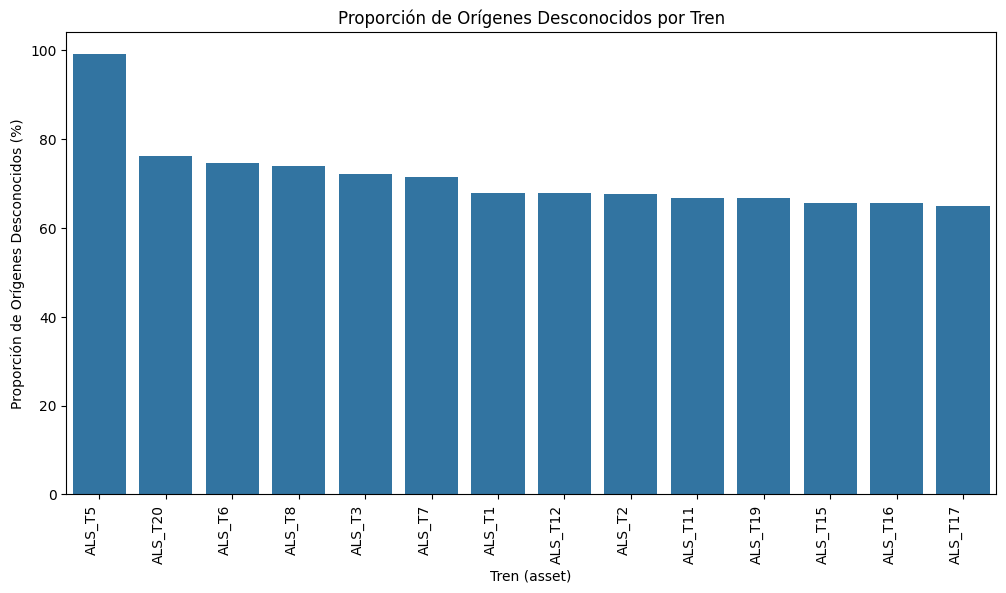

In [ ]:

df_null = df_imputed.copy()
df_null['DestinoDesconocido'] = df_null['ATC_DS'] == 0
df_null['OrigenDesconocido'] = df_null['ATC_CS'] == 0


df_destino_desconocidos = df_null.groupby('asset')['DestinoDesconocido'].sum().reset_index()
df_origen_desconocidos = df_null.groupby('asset')['OrigenDesconocido'].sum().reset_index()


df_total_registros = df_null.groupby('asset').size().reset_index(name='TotalRegistros')


df_rutas_nulas = pd.merge(df_destino_desconocidos, df_origen_desconocidos, on='asset')
df_rutas_nulas = pd.merge(df_rutas_nulas, df_total_registros, on='asset')


df_rutas_nulas['PropDestinosDesconocidos'] = (df_rutas_nulas['DestinoDesconocido']) / df_rutas_nulas['TotalRegistros'] * 100
df_rutas_nulas['PropOrigenesDesconocidos'] = (df_rutas_nulas['OrigenDesconocido']) / df_rutas_nulas['TotalRegistros'] * 100
df_rutas_nulas.sort_values(by='PropDestinosDesconocidos', ascending=False, inplace=True)


plt.figure(figsize=(12, 6))
sns.barplot(data=df_rutas_nulas.head(8), x='asset', y='PropDestinosDesconocidos')
plt.xticks(rotation=90, ha='right')
plt.title('Proporción de Destinos Desconocidos por Tren')
plt.xlabel('Tren (asset)')
plt.ylabel('Proporción de Destinos Desconocidos (%)')
plt.show()

print('\n')


df_rutas_nulas.sort_values(by='PropOrigenesDesconocidos', ascending=False, inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_rutas_nulas.head(14), x='asset', y='PropOrigenesDesconocidos')
plt.xticks(rotation=90, ha='right')
plt.title('Proporción de Orígenes Desconocidos por Tren')
plt.xlabel('Tren (asset)')
plt.ylabel('Proporción de Orígenes Desconocidos (%)')
plt.show()


#Eliminando valores insignificantes



La cantidad de registros con ATC desconocidos tiende a ser proporcional al número total de registros de cada tren, con la excepción del tren N°5, que presenta un porcentaje de ATC desconocidos cercano al 100%.


La hipótesis es que los trenes podrían tener mayor cantidad de fallos en la comunicación debido a una combinación de fallos técnicos como: fallos de comunicación más constantes al inicio del trayecto u condiciones operativas como las maneras de registrar eventos.

<Figure size 600x400 with 0 Axes>

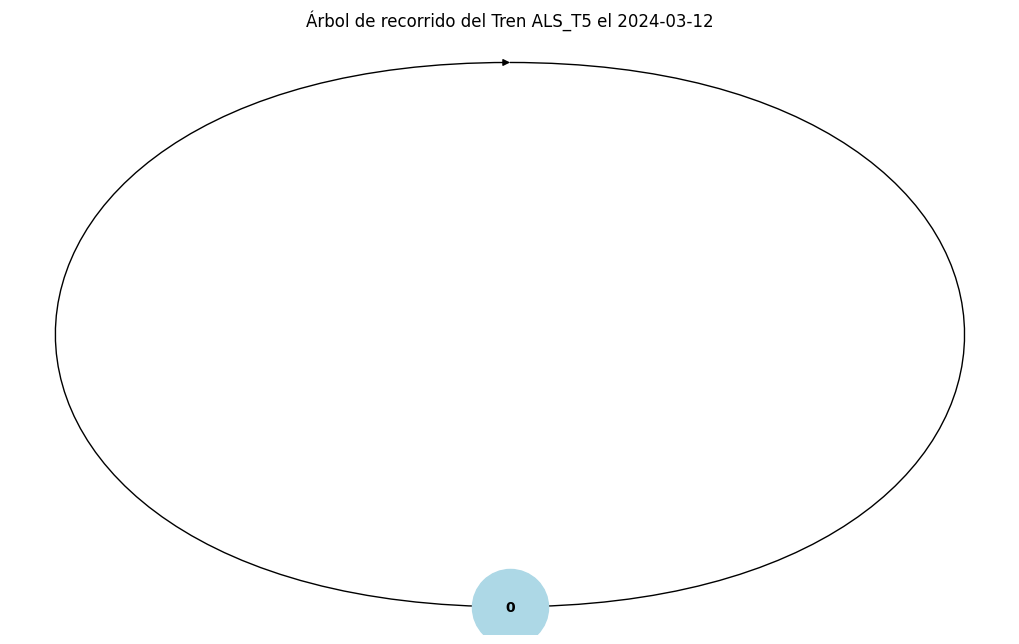

In [ ]:
dibujar_arbol_recorrido(df_imputed, '2024-03-12', 'ALS_T5')

Para eliminar problemas de inconsistencia de la data como el ejemplo propuesto, donde los trenes solo tienen un único trayecto, eliminaremos todas las salidas desconocidas.

In [ ]:
df_dropped = df_imputed.copy()
mask = df_dropped.loc[df_dropped['EnergiaConsumidaTotal'] == 0]
df_dropped = df_dropped.drop(mask.index)
nulos = len(mask)
if not nulos:
  print("Confirmamos que no hay existencia de registros en cero")
  print(f"Registros eliminados: {df.shape[0] - df_dropped.shape[0]}")
else: print(f"Hay: {nulos}, registros en cero")

mask2 = df_dropped.loc[(df_dropped['ATC_DS'] == 0) | (df_dropped['ATC_CS'] == 0)]
df_dropped = df_dropped.drop(mask2.index)
nulos2 = len(mask2)
if not nulos2:
    print("Confirmamos que no hay existencia de registros desconocidos en las entradas o salidas de un tren")
    print(f"Registros eliminados: {df.shape[0] - df_dropped.shape[0]}")
else: print(f"Hay: {nulos2}, registros desconocidos en la data")

# Eliminar el tren ALS_T5, debido a que el 99% de sus registros fueron finiquitados en la eliminación de unknowns
df_dropped_t5 = df_dropped.loc[df_dropped['asset'] == 'ALS_T5']
df_dropped.drop(df_dropped_t5.index, inplace = True)
print(f"Registros del Tren N°5 eliminados: {df_dropped_t5.shape[0]}")

df_dropped.info()


Hay: 8437, registros en cero
Hay: 1424800, registros desconocidos en la data
Registros del Tren N°5 eliminados: 3
<class 'pandas.core.frame.DataFrame'>
Index: 719638 entries, 937 to 2152845
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype                                    
---  ------                       --------------   -----                                    
 0   timestamp                    719638 non-null  timestamp[ns, tz=America/Panama][pyarrow]
 1   ACE1_EC                      719638 non-null  int32[pyarrow]                           
 2   ACE2_EC                      719638 non-null  int32[pyarrow]                           
 3   ATC_CS                       719638 non-null  int32[pyarrow]                           
 4   ATC_DS                       719638 non-null  int32[pyarrow]                           
 5   PCE1_EC                      719638 non-null  int32[pyarrow]                           
 6   PCE1_ER                     

# Número de Registros por Tren

La idea de esta sección será conseguir información valiosa sobre las agrupaciones de cada tren.

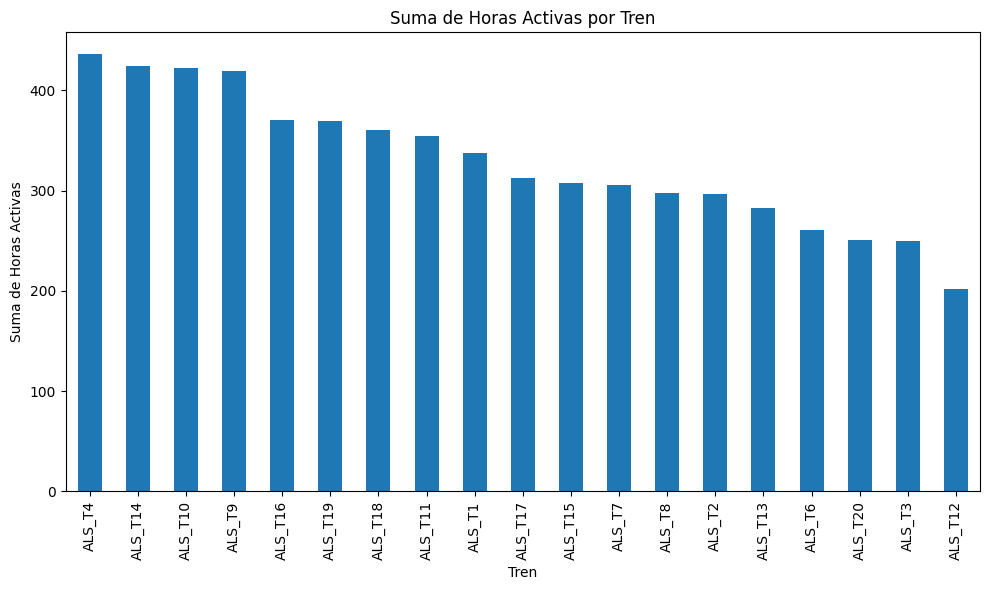

In [ ]:
df_horario_tren = df_dropped.groupby(['asset', 'Fecha'])['Hour'].agg(['min', 'max']).reset_index()
df_horario_tren['HorasActivas'] = df_horario_tren['max'] - df_horario_tren['min']
suma_horas_activas = df_horario_tren.groupby('asset')['HorasActivas'].sum()
suma_horas_activas = suma_horas_activas.sort_values(ascending=False)
suma_horas_activas.plot(kind='bar', figsize=(10, 6), title='Suma de Horas Activas por Tren')

plt.xlabel('Tren')
plt.ylabel('Suma de Horas Activas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


El tren N°4 fue el más activo durante todo el mes, seguido de otros tres trenes cuyos valores de actividad fueron similares. Es interesante destacar que, aunque el tren N°3 fue uno de los menos activos, también resultó ser uno de los más costosos en términos de consumo energético

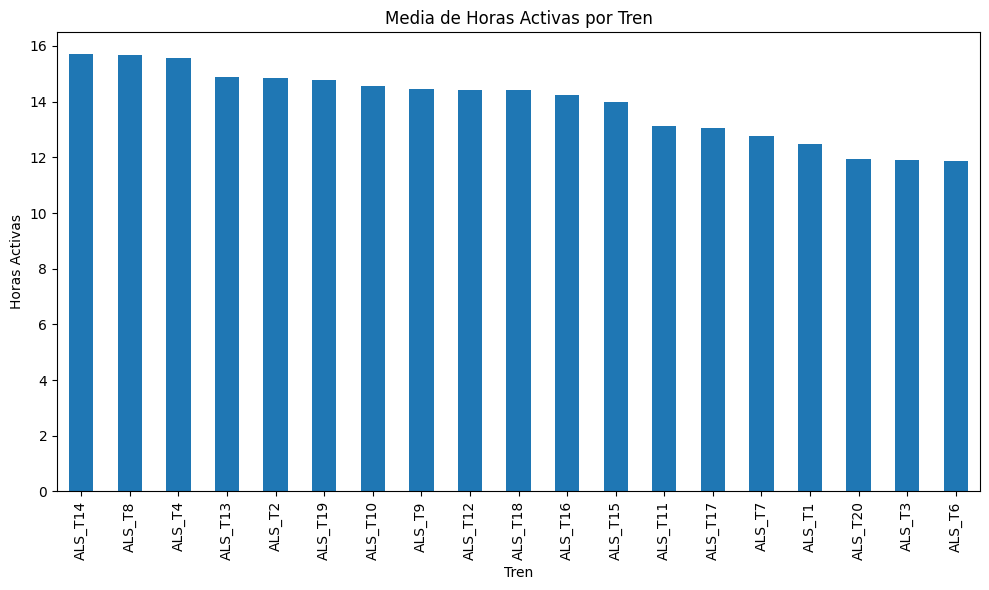

In [ ]:
df_horario_tren = df_dropped.groupby(['asset', 'Fecha'])['Hour'].agg(['min', 'max']).reset_index()
df_horario_tren['HorasActivas'] = df_horario_tren['max'] - df_horario_tren['min']
media_horas_activas = df_horario_tren.groupby('asset')['HorasActivas'].mean()
media_horas_activas = media_horas_activas.sort_values(ascending=False)
plt.title('La media de horas activas por tren es')
media_horas_activas.plot(kind='bar', figsize=(10, 6), title='Media de Horas Activas por Tren')
plt.xlabel('Tren')
plt.ylabel('Horas Activas')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()
#df_horario_tren['HorasActivas']

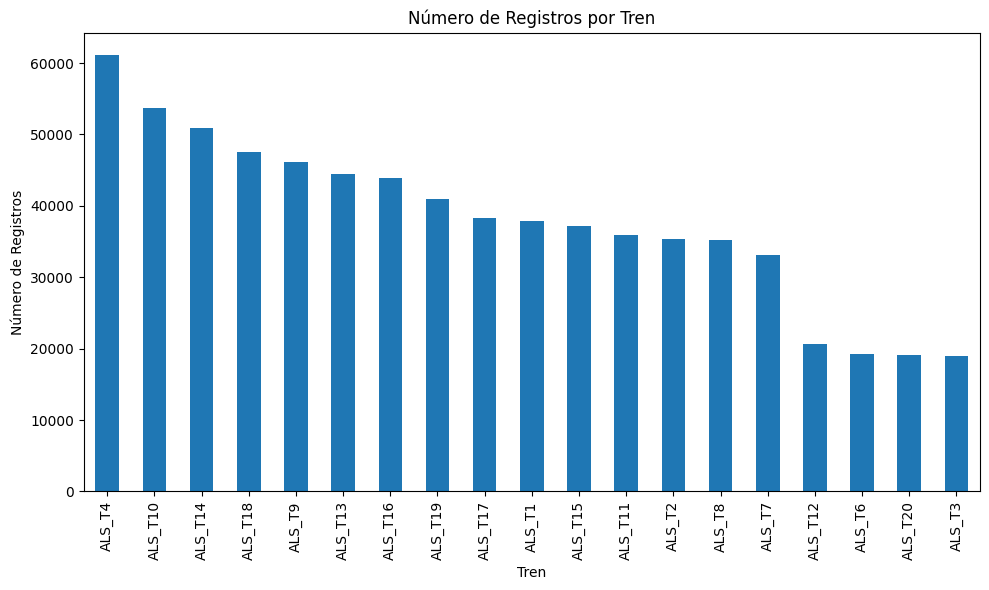

In [ ]:
df_registros_totales = df_dropped.groupby('asset')['FechaHora'].size()
df_reg = df_registros_totales.sort_values(ascending=False)
df_reg.plot(kind='bar', figsize=(10, 6), title='Número de Registros por Tren')
plt.xlabel('Tren')
plt.ylabel('Número de Registros')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

El tren con mejor atributo de conectividad, es el tren N°4, ya que tuvo registros 28 días del mes y acumuló más de 61,000 registros, con una diferencia de casi 10,000 registros al tren N°10.

In [ ]:
df_registros_por_tren = df_dropped.groupby('asset').size().reset_index(name='Cantidad de Registros')
df_registros_por_tren_fecha = df_dropped.groupby('asset')['Fecha'].nunique().reset_index(name='FechasConRegistro')

df_horario_tren = df_dropped.groupby(['asset', 'Fecha'])['Hour'].agg(['min', 'max']).reset_index()
#df_horario_tren

bins = [-1, 0, 15, 20, 27, 29]
labels = ['F', 'D', 'C', 'B', 'A']
df_registros_por_tren_fecha['Notas'] = pd.cut(df_registros_por_tren_fecha['FechasConRegistro'], bins=bins, labels=labels, right=True, include_lowest=True)
df_conteo_por_fecha = df_dropped.groupby(['asset', 'Fecha']).size().reset_index(name='Cantidad de registros')
df_min_registros_por_tren = df_conteo_por_fecha.loc[df_conteo_por_fecha.groupby('asset')['Cantidad de registros'].idxmin()]
df_max_registros_por_tren = df_conteo_por_fecha.loc[df_conteo_por_fecha.groupby('asset')['Cantidad de registros'].idxmax()]
df_combinado = pd.merge(df_registros_por_tren_fecha, df_min_registros_por_tren[['asset', 'Fecha', 'Cantidad de registros']], on='asset', how='left')
df_combinado = df_combinado.rename(columns={'Fecha': 'FechaMin', 'Cantidad de registros': 'CantidadRegistrosMin'})
df_combinado = pd.merge(df_combinado, df_max_registros_por_tren[['asset', 'Fecha', 'Cantidad de registros']], on='asset', how='left')
df_combinado = df_combinado.rename(columns={'Fecha': 'FechaMax', 'Cantidad de registros': 'CantidadRegistrosMax'})

df_registros_diarios = df_dropped.groupby(['asset', 'Fecha']).size().reset_index(name='RegistrosDiarios')
df_registros_diarios = df_registros_diarios.groupby('asset')['RegistrosDiarios'].sum().reset_index()
df_registros_diarios

df_combinado = pd.merge(df_combinado, suma_horas_activas, on='asset', how='left')
df_combinado = pd.merge(df_combinado, df_registros_diarios, on='asset', how='left')
df_combinado['MediaHorasActivas'] = round(df_combinado['HorasActivas'] / df_combinado['FechasConRegistro'], 3)
df_combinado['RegistrosDiariosMedia'] = round(df_combinado['RegistrosDiarios'] / df_combinado['FechasConRegistro'], 3)
df_combinado = df_combinado.sort_values(by='CantidadRegistrosMax', ascending=False)
df_combinado


,asset,FechasConRegistro,Notas,FechaMin,CantidadRegistrosMin,FechaMax,CantidadRegistrosMax,HorasActivas,RegistrosDiarios,MediaHorasActivas,RegistrosDiariosMedia
4,ALS_T13,19,C,2024-02-19,348,2024-02-26,4089,283,44410,14.895,2337.368
14,ALS_T4,28,A,2024-02-21,716,2024-03-08,3997,436,61171,15.571,2184.679
9,ALS_T18,25,B,2024-02-19,317,2024-02-16,3996,360,47532,14.4,1901.280
1,ALS_T10,29,A,2024-02-25,812,2024-03-12,3054,422,53652,14.552,1850.069
10,ALS_T19,25,B,2024-03-11,701,2024-03-02,2669,369,40910,14.76,1636.400
17,ALS_T8,19,C,2024-02-27,594,2024-02-23,2614,298,35220,15.684,1853.684
18,ALS_T9,29,A,2024-02-18,15,2024-02-26,2585,419,46199,14.448,1593.069
7,ALS_T16,26,B,2024-03-01,602,2024-03-11,2575,370,43898,14.231,1688.385
11,ALS_T2,20,C,2024-03-01,349,2024-02-19,2559,297,35319,14.85,1765.950
3,ALS_T12,14,D,2024-03-02,264,2024-03-08,2556,202,20691,14.429,1477.929


En caso de realizar un análisis predictivo, recomiendo utilizar el tren N°4, ya que es el tren con mejores números de conectividad, ya que tiene información sobre 29 días y la mayor medía de registros por día util y mayor cantidad de registros.

# Visualizando el consumo de Energía Diario y por Hora

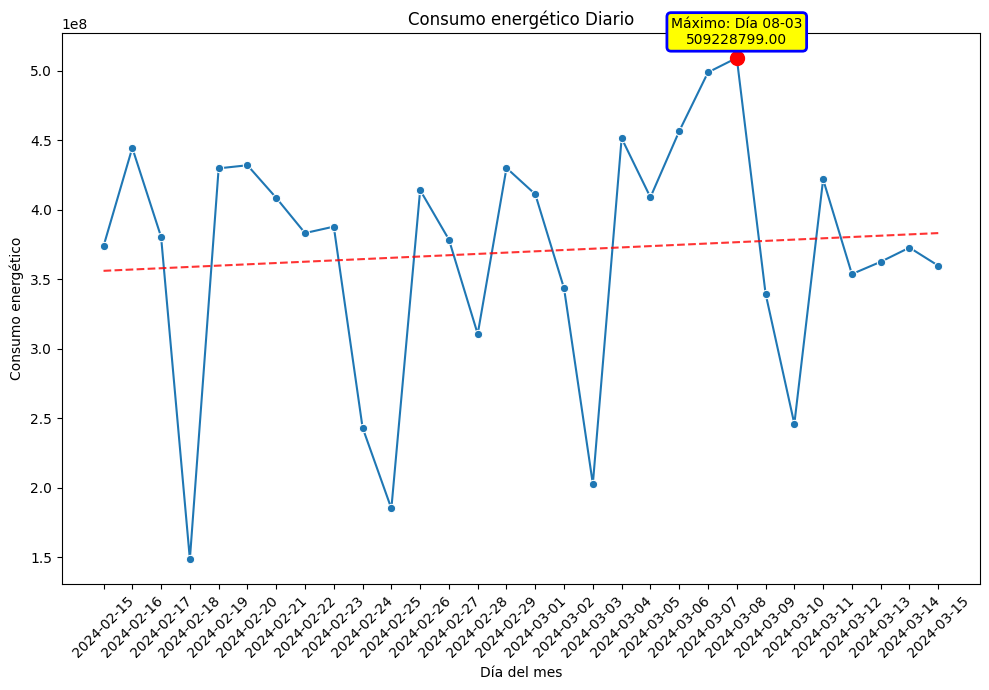

In [ ]:
media_consumo_por_dia = df_dropped.groupby(['Fecha', 'asset'])['EnergiaConsumidaTotal'].max().reset_index(name = 'max')
media_consumo_por_dia = media_consumo_por_dia.groupby(['Fecha'])['max'].sum().reset_index()

dia_mayor_consumo = media_consumo_por_dia.loc[media_consumo_por_dia['max'].idxmax()]

plt.figure(figsize=(10, 7))

sns.lineplot(x='Fecha', y='max', data=media_consumo_por_dia, marker='o')
max_consumo = dia_mayor_consumo['max']
max_fecha = dia_mayor_consumo['Fecha']

plt.plot(max_fecha, max_consumo, 'ro', markersize=10)
plt.annotate(f'Máximo: Día {max_fecha.strftime("%d-%m")}\n{max_consumo:.2f}',
             (max_fecha, max_consumo),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=2))


plt.title('Consumo energético Diario')
plt.xlabel('Día del mes')
plt.ylabel('Consumo energético')
plt.xticks(media_consumo_por_dia['Fecha'], rotation=45)
fechas_numericas = mdates.date2num(media_consumo_por_dia['Fecha'])
z = np.polyfit(fechas_numericas, media_consumo_por_dia['max'], 1)
p = np.poly1d(z)

plt.plot(media_consumo_por_dia['Fecha'], p(fechas_numericas), "r--", alpha=0.8)

plt.tight_layout()
plt.show()


El 8 de marzo fue el día con mayor consumo energético, y se observa que el día anterior también registró un pico elevado en el consumo. Dado que estas fechas coinciden con la celebración del Día Internacional de la Mujer, surge la pregunta de si podría existir alguna relación entre ambos eventos.

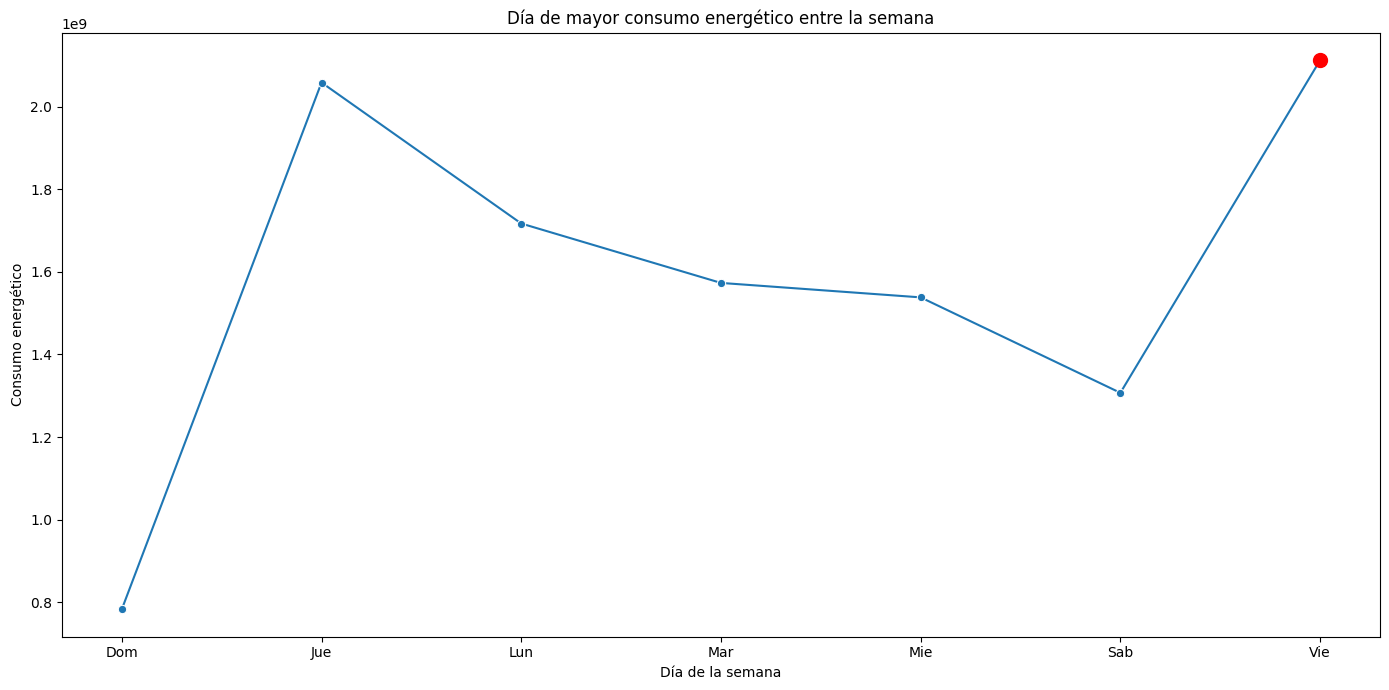

In [ ]:
media_consumo_por_dia = df_dropped.groupby(['Fecha', 'Dayweek', 'asset'])['EnergiaConsumidaTotal'].max().reset_index(name = 'max')
media_consumo_por_dia = media_consumo_por_dia.groupby(['Dayweek'])['max'].sum().reset_index()
media_consumo_por_dia['Dayweek'] = pd.Categorical(media_consumo_por_dia['Dayweek'], ordered=True)
media_consumo_por_dia = media_consumo_por_dia.sort_values('Dayweek')
dia_mayor_consumo = media_consumo_por_dia.loc[media_consumo_por_dia['max'].idxmax()]

plt.figure(figsize=(14, 7))
sns.lineplot(x='Dayweek', y='max', data=media_consumo_por_dia, marker='o')


max_day = dia_mayor_consumo['Dayweek']
max_consumo = dia_mayor_consumo['max']
max_index = media_consumo_por_dia[media_consumo_por_dia['Dayweek'] == max_day].index[0]
plt.plot(max_index, max_consumo, 'ro', markersize=10)


plt.title('Día de mayor consumo energético entre la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Consumo energético')


plt.tight_layout()
plt.show()



El día de la semana de mayor consumo energético fue el viernes, esto fue porque viernes y jueves son los únicos días de la semana que tienen una frecuencia de 5 días entre las fechas 15 de febrero a 15 de marzo.
Quitando el sesgo o utilizando la media el claro ganador es el Lunes.

# Estudiando los Sensores energéticos

La idea será identificar los trenes con medias más altas en cada conjunto de componentes utilizando las columnas, generadas con los componentes energéticos. A los asset con mayor consumo y menor consumo descomponer dichas columnas mediante visualizaciones e intentar sacar información valiosa.

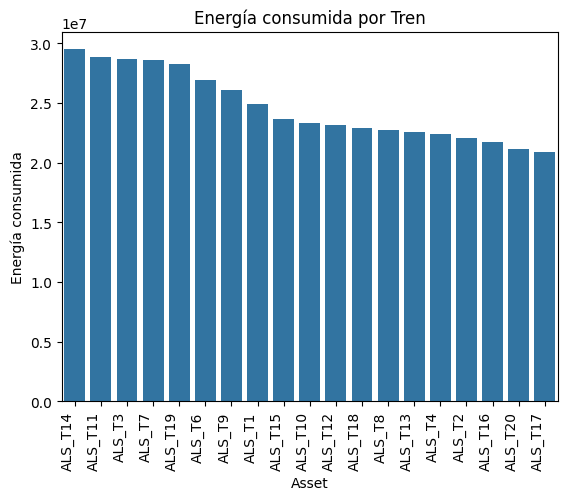

In [ ]:
df_tren = df_dropped.groupby(['asset', 'Day'])['EnergiaConsumidaTotal'].max().reset_index(name='max')
df_energia_tren = df_tren.groupby('asset')['max'].mean().reset_index()
df_energia_tren = df_energia_tren.sort_values(by='max', ascending=False)

sns.barplot(data=df_energia_tren, x='asset', y='max')
plt.xticks(rotation=90, ha='right')
plt.title('Energía consumida por Tren')
plt.xlabel('Asset')
plt.ylabel('Energía consumida')
plt.show()



Se utilizó la media para identificar cuál fue el tren con mayor consumo promedio. Podemos observar que los cuatro primeros trenes presentan valores similares entre sí, mientras que difieren significativamente de los trenes con menor consumo.

<h4> ¿Existe una diferencia de medias significativa?</h4>

In [ ]:
df_resultados, tren_base = comparar_consumo_trenes(
    df=df_dropped,
    columna_asset='asset',
    columna_fecha='FechaHora',
    columna_energia='EnergiaConsumidaTotal'
)


print(f"\nTren base seleccionado aleatoriamente: {tren_base}")
print("\nResultados de las comparaciones:")
df_resultados.round(4)


Tren base seleccionado aleatoriamente: ALS_T6

Resultados de las comparaciones:


,tren_comparado,tren_base,media_tren_base,media_tren_comparado,diferencia_medias,estadistico_t,p_valor,significativo
0,ALS_T1,ALS_T6,2.236224e+07,2.130468e+07,-1.057565e+06,2.4677,0.0139,True
1,ALS_T10,ALS_T6,2.236224e+07,1.731150e+07,-5.050736e+06,10.5891,0.0000,True
2,ALS_T11,ALS_T6,2.236224e+07,2.385361e+07,1.491372e+06,-2.1784,0.0298,True
3,ALS_T12,ALS_T6,2.236224e+07,2.013005e+07,-2.232196e+06,4.4355,0.0000,True
4,ALS_T13,ALS_T6,2.236224e+07,1.770485e+07,-4.657396e+06,7.0305,0.0000,True
5,ALS_T14,ALS_T6,2.236224e+07,2.363993e+07,1.277687e+06,-2.3797,0.0176,True
6,ALS_T15,ALS_T6,2.236224e+07,1.756772e+07,-4.794517e+06,8.1739,0.0000,True
7,ALS_T16,ALS_T6,2.236224e+07,1.486240e+07,-7.499843e+06,14.4265,0.0000,True
8,ALS_T17,ALS_T6,2.236224e+07,1.616655e+07,-6.195691e+06,13.6376,0.0000,True
9,ALS_T18,ALS_T6,2.236224e+07,1.722155e+07,-5.140690e+06,9.5561,0.0000,True


Se utilizó el tren N°6, seleccionado de manera aleatoria, para aplicar un T-test que comparara las medias del consumo energético con las de cada uno de los otros trenes. Los resultados mostraron diferencias significativas en el consumo energético entre el tren N°6 y todos los demás trenes, a excepción del tren N°3 y el tren N°7.

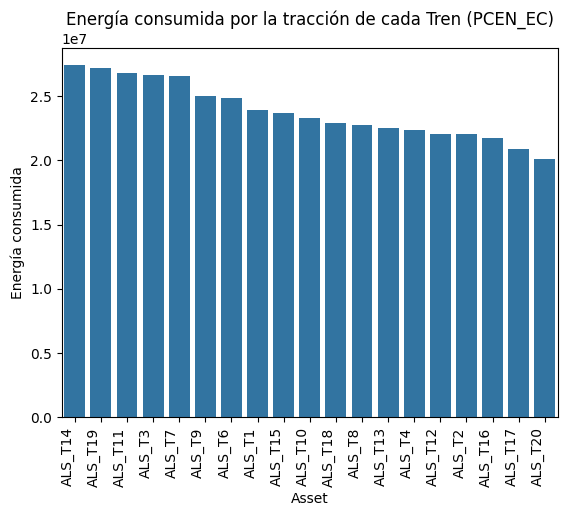

In [ ]:
df_tren = df_dropped.groupby(['asset', 'Day'])['EnergiaConsumidaTraccion'].max().reset_index(name = 'max')
df_energiatracc_tren = df_tren.groupby('asset')['max'].mean().reset_index()
df_energiatracc_tren = df_energiatracc_tren.sort_values(by='max', ascending=False)

sns.barplot(data=df_energiatracc_tren, x='asset', y='max')
plt.xticks(rotation=90, ha='right')
plt.title('Energía consumida por la tracción de cada Tren (PCEN_EC)')
plt.xlabel('Asset')
plt.ylabel('Energía consumida')
plt.show()

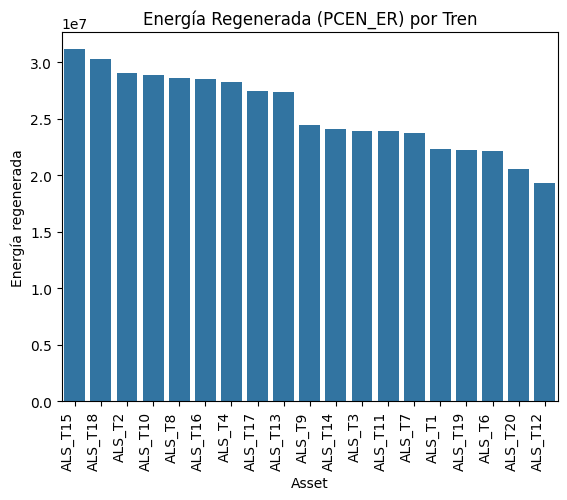

In [ ]:
df_tren = df_dropped.groupby(['asset', 'Day'])['EnergiaRegenerada'].max().reset_index(name = 'max')
df_energiareg_tren = df_tren.groupby('asset')['max'].mean().reset_index()
df_energiareg_tren = df_energiareg_tren.sort_values(by='max', ascending=False)

sns.barplot(data=df_energiareg_tren, x='asset', y='max')
plt.xticks(rotation=90, ha='right')
plt.title('Energía Regenerada (PCEN_ER) por Tren')
plt.xlabel('Asset')
plt.ylabel('Energía regenerada')
plt.show()

El tren N°15 fue el más destacado en cuanto a regeneración de energía. Sería interesante analizar sus rutas para investigar si existe alguna relación entre los trayectos recorridos y el consumo total de energía.

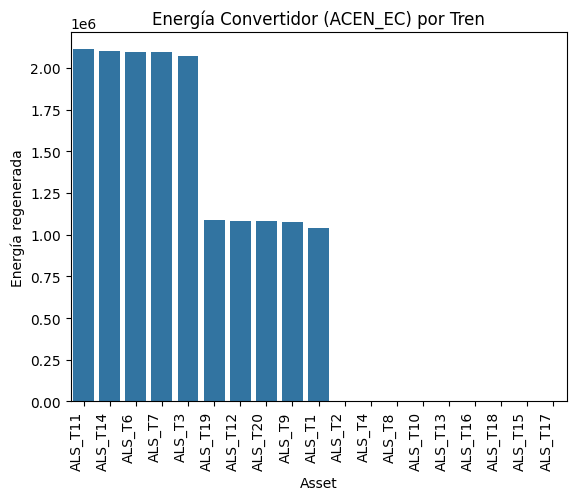

In [ ]:
df_abs = df_dropped.copy()
df_abs['EnergiaConsumidaConvertidor'] = abs(df_abs['EnergiaConsumidaConvertidor'])
df_tren = df_abs.groupby(['asset', 'Day'])['EnergiaConsumidaConvertidor'].max().reset_index(name = 'max')
df_energiareg_tren = df_tren.groupby('asset')['max'].mean().reset_index()
df_energiareg_tren = df_energiareg_tren.sort_values(by='max', ascending=False)

sns.barplot(data=df_energiareg_tren, x='asset', y='max')
plt.xticks(rotation=90, ha='right')
plt.title('Energía Convertidor (ACEN_EC) por Tren')
plt.xlabel('Asset')
plt.ylabel('Energía regenerada')
plt.show()

Una gran cantidad de trenes presenta valores notablemente bajos en los convertidores. No se trata de valores nulos, sino de una escala considerablemente menor en comparación con otros trenes.
¿Qué rutas son las visitadas por los trenes con valores bajos?

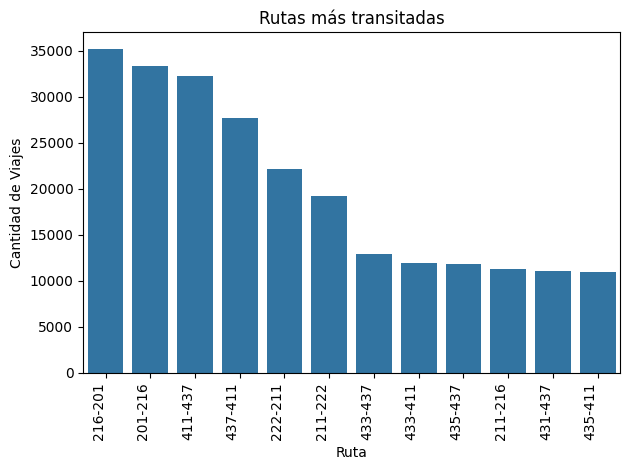

In [ ]:
df_rutas_consumo = df_dropped.groupby(['ATC_DS', 'ATC_CS']).size().reset_index(name='CantidadViajes')
df_rutas_consumo = df_rutas_consumo.sort_values(by='CantidadViajes', ascending=False)
df_rutas_consumo['Ruta'] = df_rutas_consumo['ATC_CS'].astype(str) + '-' + df_rutas_consumo['ATC_DS'].astype(str)

sns.barplot(data=df_rutas_consumo.head(12), x='Ruta', y='CantidadViajes')
plt.xticks(rotation=90, ha='right')
plt.title('Rutas más transitadas')
plt.xlabel('Ruta')
plt.ylabel('Cantidad de Viajes')
plt.tight_layout()
plt.show()

# Estudio Inferencial

1. Seleccionar la un tren (Sin contar el N°5) de manera aleatoria y plantear hipótesis en base a los resultados.



El tren que se estudiará es: ALS_T6


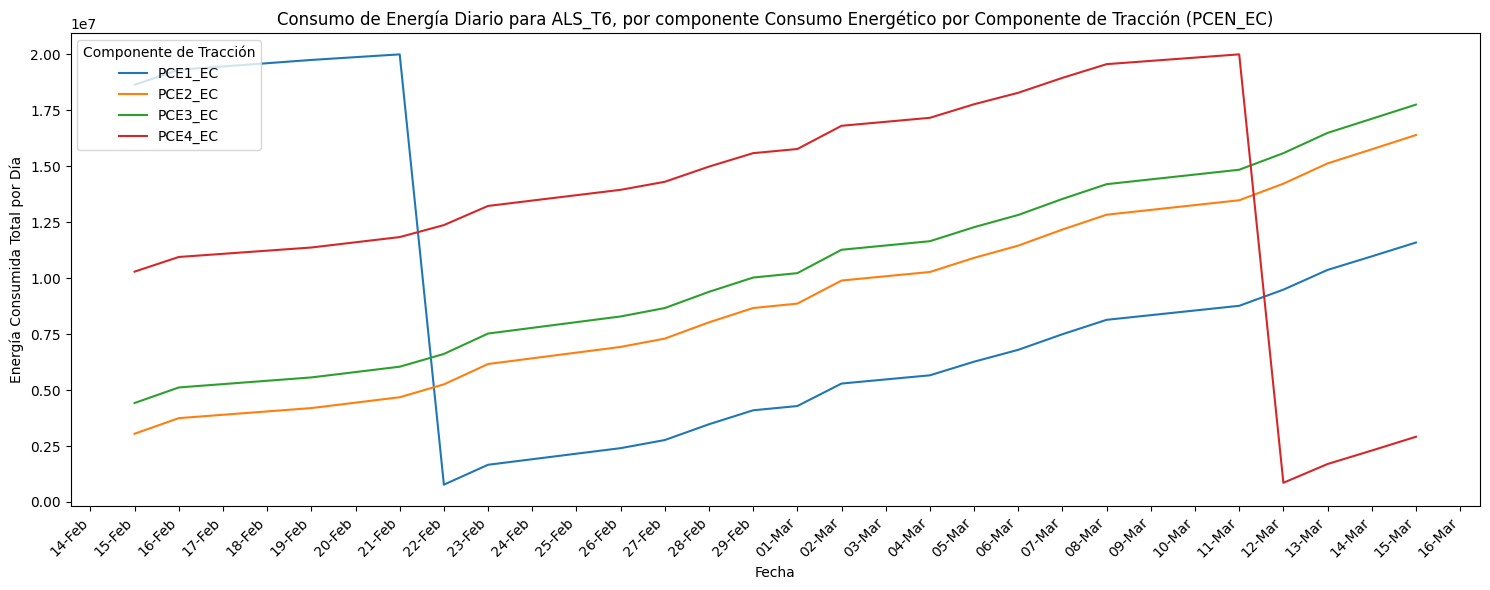

In [ ]:
random.seed(2024)
opciones = df_dropped['asset'].value_counts()[1:].index.tolist()
tren_estudiar = random.choice(opciones)
print(f"El tren que se estudiará es: {tren_estudiar}")
componentes_traccion = ['PCE1_EC', 'PCE2_EC', 'PCE3_EC', 'PCE4_EC']
timeline_por_componente(df_dropped, [tren_estudiar], componentes_traccion, 'Consumo Energético por Componente de Tracción (PCEN_EC)')

En un escenario ideal, todos los componentes seguirían el patrón de los componentes PCE2_EC Y PCE3_EC, donde el consumo energético sigue una tendencia bien definida a lo largo del tiempo, a medida que los sensores se desequilibran.

¿Porque existe esos bajones en los componentes 1 y 4?


<ipython-input-48-89a59574c0be>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  (df_dropped['Fecha'].isin(['02-22-2024', '03-12-2024']))]


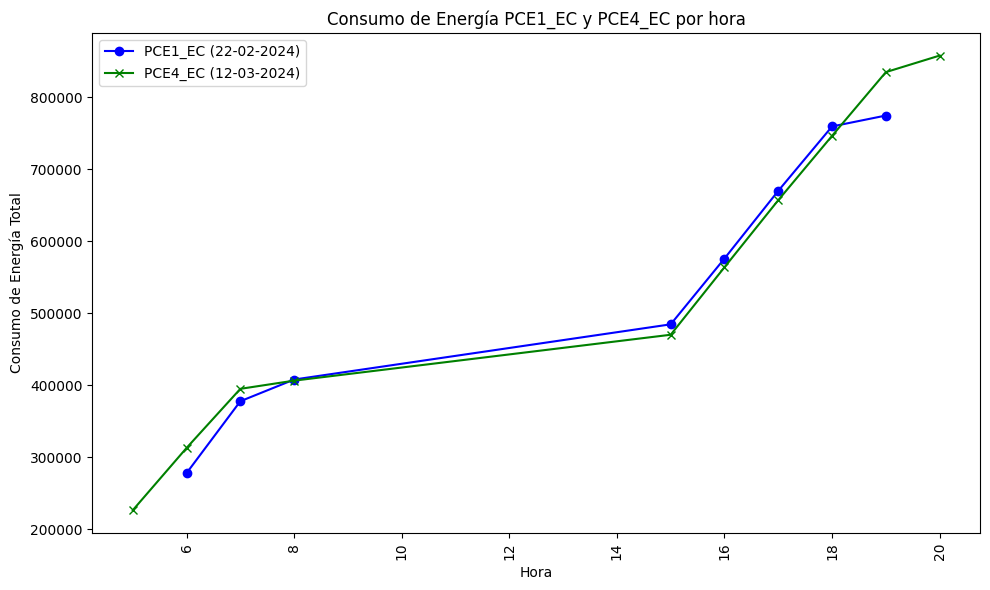

In [ ]:
df_tren_estudiado = df_dropped.loc[(df_dropped['asset'] == tren_estudiar) &
                                   (df_dropped['Fecha'].isin(['02-22-2024', '03-12-2024']))]
df_PCE1 = df_tren_estudiado.loc[df_tren_estudiado['Fecha'] == '02-22-2024']
df_PCE1 = df_PCE1.groupby('Hour')['PCE1_EC'].max().reset_index()
df_PCE4 = df_tren_estudiado.loc[df_tren_estudiado['Fecha'] == '03-12-2024']
df_PCE4 = df_PCE4.groupby('Hour')['PCE4_EC'].max().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_PCE1['Hour'], df_PCE1['PCE1_EC'], label='PCE1_EC (22-02-2024)', color='blue', linestyle='-', marker='o')
plt.plot(df_PCE4['Hour'], df_PCE4['PCE4_EC'], label='PCE4_EC (12-03-2024)', color='green', linestyle='-', marker='x')

plt.xticks(rotation=90)
plt.xlabel('Hora')
plt.ylabel('Consumo de Energía Total')
plt.title('Consumo de Energía PCE1_EC y PCE4_EC por hora')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df_tren_estudiado = df_dropped.loc[(df_dropped['asset'] == tren_estudiar) &
                                 (df_dropped['Fecha'].isin(['02-21-2024', '03-11-2024']))]
idx_max_PCE1 = df_tren_estudiado.loc[df_tren_estudiado['Fecha'] == '02-21-2024', 'PCE1_EC'].idxmax()
idx_max_PCE4 = df_tren_estudiado.loc[df_tren_estudiado['Fecha'] == '03-11-2024', 'PCE4_EC'].idxmax()

max_consumo_PCE1 = df_tren_estudiado.loc[idx_max_PCE1, 'PCE1_EC']
max_consumo_PCE4 = df_tren_estudiado.loc[idx_max_PCE4, 'PCE4_EC']

print(f"La cantidad máxima registrada por el componente PCE1_EC fue de: {max_consumo_PCE1}")
print(f"La cantidad máxima registrada por el componente PCE4_EC fue de: {max_consumo_PCE4}")

La cantidad máxima registrada por el componente PCE1_EC fue de: 19998908
La cantidad máxima registrada por el componente PCE4_EC fue de: 19999520


<ipython-input-49-81673b60fa5d>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  (df_dropped['Fecha'].isin(['02-21-2024', '03-11-2024']))]


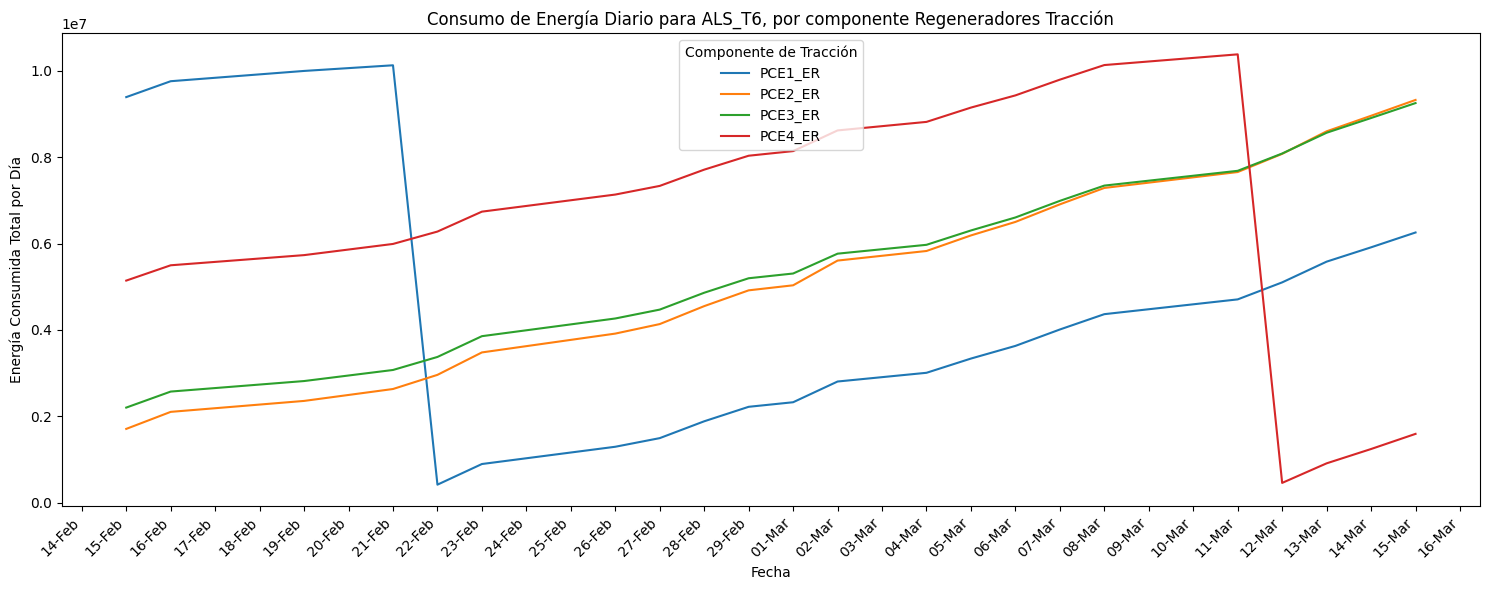

In [ ]:
df_reg = df_dropped.copy()
df_reg[['PCE1_ER', 'PCE2_ER', 'PCE3_ER', 'PCE4_ER']] = abs(df_reg[['PCE1_ER', 'PCE2_ER', 'PCE3_ER', 'PCE4_ER']])
titulo = 'Regeneradores Tracción'
#trenes_estudiar = ['ALS_T14','ALS_T6', 'ALS_T2', 'ALS_T18', 'ALS_T12']
componentes_traccion = ['PCE1_ER', 'PCE2_ER', 'PCE3_ER', 'PCE4_ER']
timeline_por_componente(df_reg, [tren_estudiar], componentes_traccion, titulo)

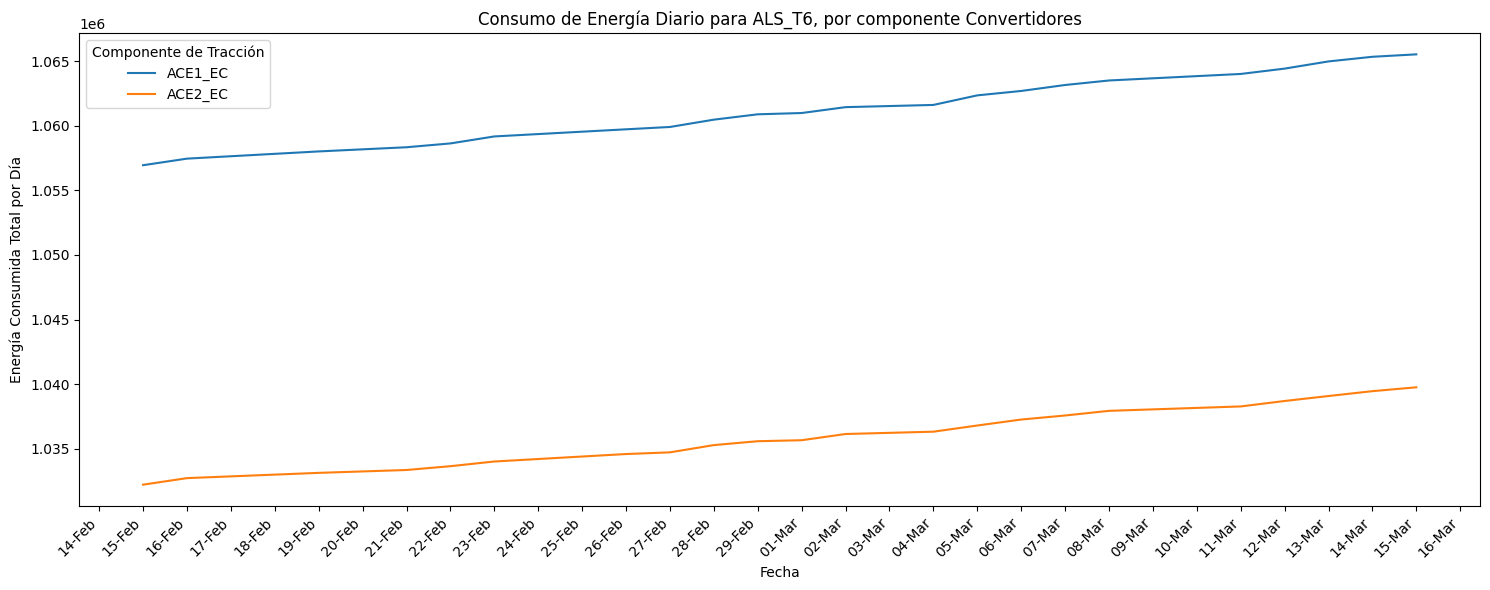

In [ ]:
titulo = 'Convertidores'
#trenes_estudiar = ['ALS_T11', 'ALS_T14', 'ALS_T10', 'ALS_T16', 'ALS_T5']
componentes_traccion = ['ACE1_EC', 'ACE2_EC']
timeline_por_componente(df_dropped, [tren_estudiar], componentes_traccion, titulo)

# Recomendaciones
1. Incorporación de información adicional de los trenes: Para mejorar el análisis, se recomienda agregar datos sobre condiciones ambientales y mantenimiento de los trenes. Esta información ayudaría a explicar los picos y caídas observados en los distintos componentes y trenes.


2. **Revisión del modo de conducción del tren**: Dado que se encontraron diferencias significativas en los valores desconocidos cuando el tren opera en modo automático, se sugiere revisar el software de las computadoras a bordo. Esto permitiría identificar posibles fallos de comunicación, problemas de compatibilidad del software o posibles errores de memoria que hacen que haya una pérdida de información.


3. **Relleno de Rutas Desconocidas**: Propongo las siguientes estrategias para abordar el problema de los valores desconocidos en las rutas:

    1. Implementar un algoritmo de Sliding Window, de modo que cada vez que un registro presente una entrada o salida con valor 0, se complete la información utilizando los registros vecinos más cercanos.

    2. Reemplazar los valores 0 en las entradas con NaN y luego aplicar un algoritmo de imputación basado en cadenas de Markov o K-Nearest Neighbors (KNN) para estimar los valores correctos.

    3. Crear una nueva variable que identifique el inicio y el final de un viaje, es decir, el momento en que el tren cambia de ATC_CS a ATC_DS. Con esta información, calcular la diferencia de tiempo entre los registros inicial y final, estimando la duración promedio de la ruta. Los registros faltantes dentro de ese intervalo podrían imputarse utilizando estos valores promedio.

4. **Modelos Predictivos**:  En caso de intentar predecir el consumo energético al día de la flota recomiendo lo siguiente:

    1. Ampliar las fechas, recopilar la información de 1 o 2 años sobre un tren en especifico para ser capaz de capturar la tendencia y estacionalidad de los consumos energéticos.

    2. Enfocar el modelo en 1 solo tren con intervalos de tiempo constantes, además de definir el intervalo de tiempo en el cual se quiere hacer la predicción del consumo de la flota (1 mes, 1 día, etc...).

    3. Empezar por un modelo AR (Autoregresivo), luego con un MA (medias móviles), después un ARIMA (AutoRegresivo, Diferencial de Medias Móviles) y por último una red neuronal basada en la arquitectura de una LSTM (Long-Short Term Memory). Luego hacer un model selection mediante pruebas de AIC (Akaike Information Creteria) o RMSE (Root Mean Squared Error) para ver que tan bien es capaz de capturar la variabilidad de la estacionalidad y los patrones de la data.





